# Carga de paquetes

In [95]:
from torch.optim import Adam
from torchvision import transforms
from torch.utils.data import  DataLoader, ConcatDataset

from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

import os
import pylab as pl
from IPython import display
import nibabel
from preprocessing import * 

# CARGA DE DATOS

In [96]:
BASE_PATH = os.getcwd() + "\\data"
TRAINING_PATH_AMSTERDAM= BASE_PATH + "\\training\\Amsterdam\\GE3T\\"
TRAINING_PATH_SINGAPORE= BASE_PATH + "\\training\\Singapore\\"
TRAINING_PATH_UTRECHT= BASE_PATH + "\\training\\Utrecht\\"

TEST_PATH_AMSTERDAM= BASE_PATH + "\\test\\Amsterdam\\"
TEST_PATH_SINGAPORE= BASE_PATH + "\\test\\Singapore\\"
TEST_PATH_UTRECHT= BASE_PATH + "\\test\\Utrecht\\"

# DICCIONARIO TRAINING Y TEST

In [97]:
TRAINING_DICT={
    "pathsFLAIR":[],
    "pathsT1":[],
    "mask" :[],
    "location":[],
    "ID":[]
}
createDictionary(TRAINING_PATH_UTRECHT, TRAINING_DICT,"Utrecht")
createDictionary(TRAINING_PATH_SINGAPORE, TRAINING_DICT, "Singapore")
createDictionary(TRAINING_PATH_AMSTERDAM, TRAINING_DICT,"Amsterdam")

In [4]:
TEST_DICT={
    "pathsFLAIR":[],
    "pathsT1":[],
    "mask" :[],
    "location":[],
    "ID":[]
}
createDictionary(TEST_PATH_UTRECHT, TEST_DICT,"Utrecht")
createDictionary(TEST_PATH_SINGAPORE, TEST_DICT,"Singapore")
createDictionary(os.path.join(TEST_PATH_AMSTERDAM, "GE1T5"), TEST_DICT,"Amsterdam")
createDictionary(os.path.join(TEST_PATH_AMSTERDAM, "GE3T"), TEST_DICT,"Amsterdam")
createDictionary(os.path.join(TEST_PATH_AMSTERDAM, "Philips_VU .PETMR_01"), TEST_DICT,"Amsterdam")

# Crear dataset entrenamiento y test

In [5]:
train,val=divideDataset(TRAINING_DICT,0.8)
print("total training FLAIR images", len(train.__getitem__("pathsFLAIR")))
print("total test FLAIR images", len(val.__getitem__("pathsFLAIR")))

total training FLAIR images 48
total test FLAIR images 12


In [98]:
train,val=getIDs(TRAINING_DICT)
print("total training FLAIR images", len(train.__getitem__("pathsFLAIR")))
print("total test FLAIR images", len(val.__getitem__("pathsFLAIR")))

total training FLAIR images 48
total test FLAIR images 12


In [49]:
print(val)

{'pathsFLAIR': ['c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\data\\training\\Utrecht\\11\\pre\\FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\data\\training\\Utrecht\\17\\pre\\FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\data\\training\\Utrecht\\21\\pre\\FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\data\\training\\Utrecht\\25\\pre\\FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\data\\training\\Utrecht\\29\\pre\\FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\data\\training\\Utrecht\\4\\pre\\FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\data\\training\\Singapore\\50\\pre\\FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensit

In [8]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((128,128), antialias=True),
])

transform_label=transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((128,128), antialias=True, interpolation= transforms.InterpolationMode.NEAREST),
])

In [9]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,30,False)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,False)
test_dl = DataLoader(test_data, batch_size=15, shuffle=True)
print(train_dl.batch_size)

2934
646
30


(-0.5, 239.5, 239.5, -0.5)

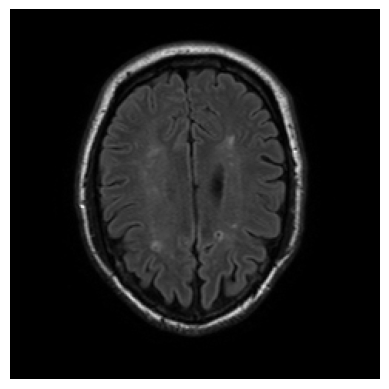

In [49]:
flair= os.path.join(TEST_PATH_UTRECHT, "10","pre","FLAIR.nii.gz")
img = nibabel.load(flair)
image_data = img.get_fdata() 
image_orig=image_data[:, :,29]
image_orig = np.rot90(image_orig)
plt.imshow(image_orig, cmap='gray')
plt.axis('off')

(-0.5, 239.5, 239.5, -0.5)

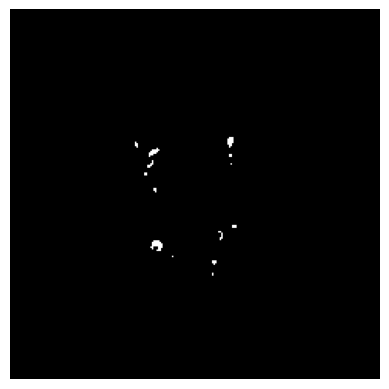

In [48]:
flair= os.path.join(TEST_PATH_UTRECHT, "10","wmh.nii.gz")
img = nibabel.load(flair)
image_data = img.get_fdata() 
image_orig=image_data[:, :,29]
image_orig[image_orig==2]=0
image_orig = np.rot90(image_orig)
plt.imshow(image_orig, cmap='gray')
plt.axis('off')

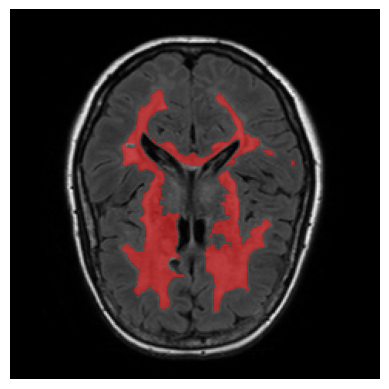

In [17]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Cargar la imagen FLAIR
flair_path = os.path.join(TEST_PATH_UTRECHT, "9", "pre", "FLAIR.nii.gz")
img_flair = nib.load(flair_path)
flair_data = img_flair.get_fdata()
flair_slice = flair_data[:, :, 24]  # Selecciona la rebanada deseada

# Cargar la máscara (asegúrate de que la ruta sea correcta)
mask_path = os.path.join(TEST_PATH_UTRECHT, "9","wmh.nii.gz")  # Reemplaza con la ruta correcta
img_mask = nib.load(mask_path)
mask_data = img_mask.get_fdata()
mask_slice = mask_data[:, :, 24]  # Selecciona la misma rebanada
mask_slice[mask_slice==2]=0
# Rotar las imágenes
flair_slice_rotated = np.rot90(flair_slice)
mask_slice_rotated = np.rot90(mask_slice)

mask_rgba = np.zeros((mask_slice_rotated.shape[0], mask_slice_rotated.shape[1], 4), dtype=np.uint8)
mask_rgba[:, :, 0] = mask_slice_rotated * 255  # Componente roja
mask_rgba[:, :, 3] = mask_slice_rotated * 255  # Componente alfa

# Convertir a imagen PIL y mostrar
mask_image = Image.fromarray(mask_rgba)
# Mostrar la imagen FLAIR
plt.imshow(flair_slice_rotated, cmap='gray')
plt.axis('off')

# Superponer la máscara en otro color (por ejemplo, rojo) con transparencia
plt.imshow(mask_image, cmap='jet', alpha=0.5)

plt.show()


# Preprocesamiento 

-   Cropping and padding
- obtiene region cerebral, se rellenan los huecos que pueda haber, se normaliza con gaussian normalization
- las imágenes finales tienen 2 canales ya que ponen una encima de la otra T1 Y FLAIR
- removing skull


(-0.5, 239.5, 239.5, -0.5)

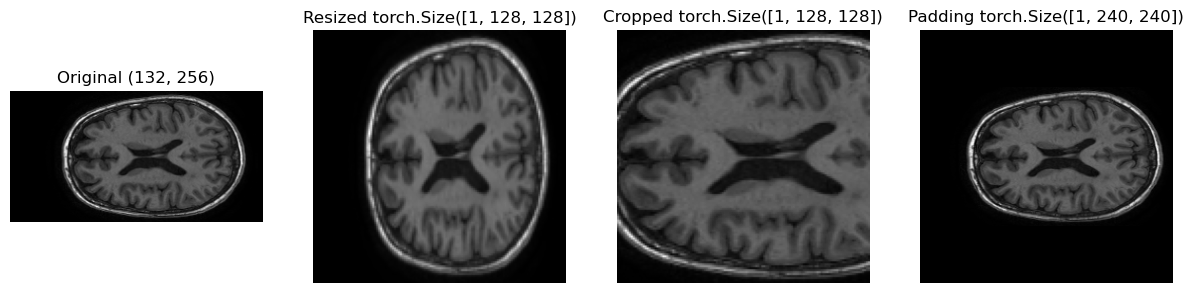

In [48]:
fig,axs = plt.subplots(1, 4, figsize=(15,5))
flair= os.path.join(TRAINING_PATH_AMSTERDAM, "100","pre","T1.nii.gz")
img = nibabel.load(flair)
image_data = img.get_fdata() 
image_orig=image_data[:, :,53]
axs[0].imshow(image_orig, cmap='gray')
axs[0].set_title("Original %s" %(image_orig.shape,))
axs[0].axis('off')

image_res=add_transformation(image_data[:, :, 53],128, True, False)
axs[1].imshow(image_res.squeeze(0), cmap='gray')
axs[1].set_title("Resized %s" %(image_res.shape,))
axs[1].axis('off')

image_crop=add_transformation(image_data[:, :, 53],128, False,False)
axs[2].imshow(image_crop.squeeze(0), cmap='gray')
axs[2].set_title("Cropped %s" %(image_crop.shape,))
axs[2].axis('off')

image_pad=add_transformation(image_data[:, :, 53],240, False,False)
axs[3].imshow(image_pad.squeeze(0), cmap='gray')
axs[3].set_title("Padding %s" %(image_pad.shape,))
axs[3].axis('off')


(-0.5, 239.5, 239.5, -0.5)

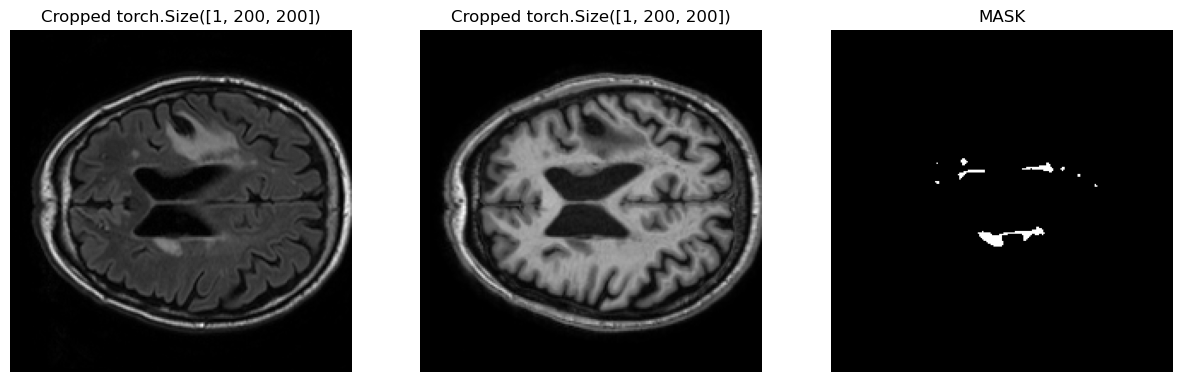

In [34]:
fig,axs = plt.subplots(1, 3, figsize=(15,5))
flair= os.path.join(TRAINING_PATH_UTRECHT, "19","pre","FLAIR.nii.gz")
img = nibabel.load(flair)
image_data = img.get_fdata() 
image_crop=add_transformation(image_data[:, :, 31],200, False,False)
axs[0].imshow(image_crop.squeeze(0), cmap='gray')
axs[0].set_title("Cropped %s" %(image_crop.shape,))
axs[0].axis('off')

flair= os.path.join(TRAINING_PATH_UTRECHT, "19","pre","T1.nii.gz")
img = nibabel.load(flair)
image_data = img.get_fdata() 
image_crop=add_transformation(image_data[:, :, 31],200, False,False)
axs[1].imshow(image_crop.squeeze(0), cmap='gray')
axs[1].set_title("Cropped %s" %(image_crop.shape,))
axs[1].axis('off')

mask= os.path.join(TRAINING_PATH_UTRECHT, "19", "wmh.nii.gz")
img = nib.load(mask)
image_data = img.get_fdata() 
merged_image= np.array(image_data)
merged_image[merged_image==1]=255
merged_image[merged_image==2]=0
merged_image[merged_image==3]=255
image_data= merged_image


axs[2].imshow(image_data[:, :,31], cmap='gray')
axs[2].set_title("MASK")
axs[2].axis('off')

# Skull stripping

# Concatenar imágenes

(-0.5, 511.5, 131.5, -0.5)

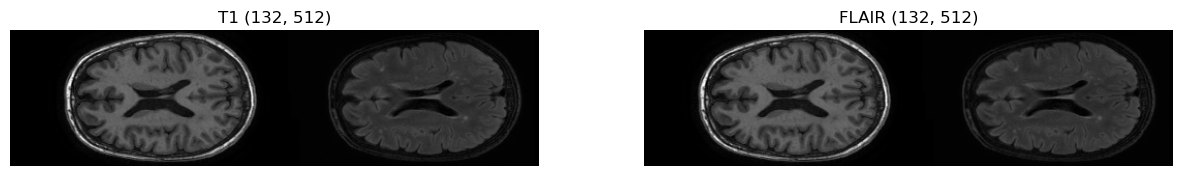

In [31]:
fig,axs = plt.subplots(1, 2, figsize=(15,5))
flair= os.path.join(TRAINING_PATH_AMSTERDAM, "100","pre","FLAIR.nii.gz")
t1=os.path.join(TRAINING_PATH_AMSTERDAM, "100","pre","T1.nii.gz")

fl = nibabel.load(flair)
fl_data = fl.get_fdata()[:,:,53] 
t=nibabel.load(t1)
t_data=t.get_fdata()[:,:,53] 
image_orig=numpy.concatenate((t_data[...,np.newaxis],fl_data[...,np.newaxis]), axis=2)
axs[0].imshow(image_orig[...,0], cmap='gray')
axs[0].set_title("T1 %s" %(image_orig.shape,))
axs[0].axis('off')

axs[1].imshow(image_orig[...,1], cmap='gray')
axs[1].set_title("FLAIR %s" %(image_orig.shape,))
axs[1].axis('off')

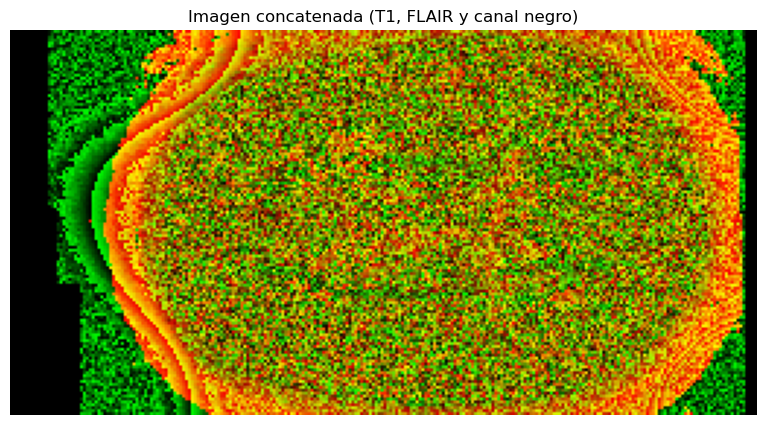

In [38]:
black_channel = np.zeros_like(t_data)

# Concatenar las imágenes y el canal negro a lo largo del eje de canales
image_concat = np.stack((t_data, fl_data, black_channel), axis=2)

# Mostrar la imagen concatenada en color
plt.figure(figsize=(10, 5))
plt.imshow((image_concat*255).astype(np.uint8), cmap = 'gray')
plt.title('Imagen concatenada (T1, FLAIR y canal negro)')
plt.axis('off')  # Opcional: para ocultar los ejes
plt.show()

## Brain Filling &  Normalización

(-0.5, 255.5, 131.5, -0.5)

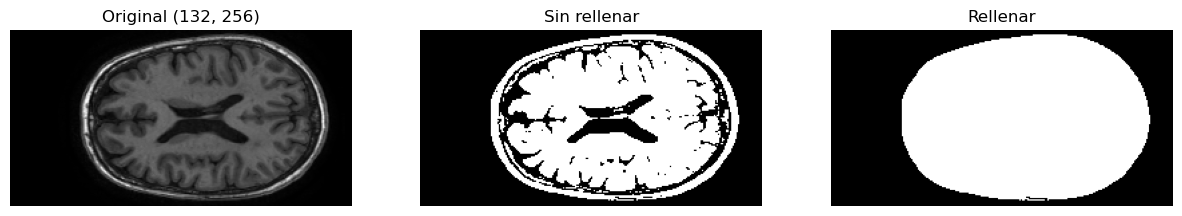

In [51]:
fig,axs = plt.subplots(1, 3, figsize=(15,5))
flair= os.path.join(TRAINING_PATH_AMSTERDAM, "100","pre","T1.nii.gz")
img = nibabel.load(flair)
image_data = img.get_fdata() 
image_orig=image_data[:, :,53]
axs[0].imshow(image_orig, cmap='gray')
axs[0].set_title("Original %s" %(image_orig.shape,))
axs[0].axis('off')


mask= brainMask(image_orig)
axs[1].imshow(mask, cmap='gray')
axs[1].set_title("Sin rellenar")
axs[1].axis('off')


mask= brainfilling(mask)
axs[2].imshow(mask, cmap='gray')
axs[2].set_title("Rellenar")
axs[2].axis('off')


(-0.5, 255.5, 131.5, -0.5)

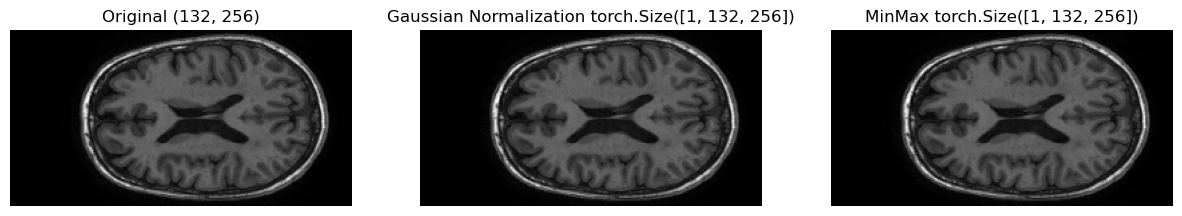

In [52]:

fig,axs = plt.subplots(1, 3, figsize=(15,5))
flair= os.path.join(TRAINING_PATH_AMSTERDAM, "100","pre","T1.nii.gz")
img = nibabel.load(flair)
image_data = img.get_fdata() 
image_orig=image_data[:, :,53]
axs[0].imshow(image_orig, cmap='gray')
axs[0].set_title("Original %s" %(image_orig.shape,))
axs[0].axis('off')
mask_tensor= transforms.ToTensor()(mask)
image_res=gaussian_normalizationFILL(transforms.ToTensor()(image_data[:, :, 53]), mask_tensor)
axs[1].imshow(image_res.squeeze(0), cmap='gray')
axs[1].set_title("Gaussian Normalization %s" %(image_res.shape,))
axs[1].axis('off')

image_crop=minmax_normalizationFILL(transforms.ToTensor()(image_data[:, :, 53]), mask_tensor)
axs[2].imshow(image_crop.squeeze(0), cmap='gray')
axs[2].set_title("MinMax %s" %(image_crop.shape,))
axs[2].axis('off')

# MÉTODOS ENTRENAMIENTO

In [99]:
from unet import UNet 
use_cuda = True
torch.manual_seed(33)

if use_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
model = UNet(in_channels=1,out_channels=1, init_features=32)
model=model.to(device)

In [7]:
def traintestpipeline(epochs: int, optim: Adam, criterion: DiceLoss, min_loss: int, name: str):
    t_loss = np.zeros((epochs))
    v_loss = np.zeros((epochs))
    pbar = tqdm(range(1, epochs+1)) # tdqm permet tenir text dinàmic
    for epoch in pbar:
        
        train_loss = 0 
        val_loss = 0  
        
        model.train()                                                  
        for batch_num, (input_img, target) in enumerate(train_dl, 1):   
        

            input_img= input_img.to(device).float()
            target = target.to(device).float()
            
            
            output = model(input_img)
            loss = criterion(output, target)
            loss.backward()                                            
            optim.step()                                               
            optim.zero_grad()     
            
            train_loss += loss.item()    
                                                        
        model.eval()   
        with torch.no_grad():                                          
            for input_img, target in val_dl: 
                input_img = input_img.to(device).float()
                target = target.to(device)
                
                output = model(input_img)                                   
                loss = criterion(output, target)   
                val_loss += loss.item()  
        
        # RESULTATS
        train_loss /= len(train_dl)
        t_loss[epoch-1] = train_loss
        
        val_loss /= len(val_dl)   
        v_loss[epoch-1] = val_loss
        if(v_loss[epoch-1]<min_loss):
            min_loss=v_loss[epoch-1]
            torch.save(model.state_dict(), name)  
        # VISUALITZACIO DINAMICA
        plt.figure(figsize=(12, 4))
        pl.plot(t_loss[:epoch], label="train")
        pl.plot(v_loss[:epoch], label="validation")
        pl.legend()
        pl.xlim(0, epochs)
        pl.xticks(range(0,epochs,1),range(1,epochs+1,1))
        
        display.clear_output(wait=True)
        display.display(pl.gcf())
        plt.close()

        pbar.set_description(f"Epoch:{epoch} Training Loss:{train_loss} Validation Loss:{val_loss}")

- dice coefficient
- hausdorf distance
- precision
- accuracy
- Intersection over Union(IOU)

- Average volume difference (in percentage)
- Sensitivity for individual lesions (recall)
-  F1-score for individual lesions

https://medium.com/@nghihuynh_37300/understanding-evaluation-metrics-in-medical-image-segmentation-d289a373a3f 

In [100]:
def precision_score(pred_mask,groundtruth_mask):
    intersect = torch.sum(pred_mask*groundtruth_mask)
    total_pixel_pred = torch.sum(pred_mask)
    if total_pixel_pred == 0:
        return torch.tensor(0.0, device=pred_mask.device)
    precision = torch.mean(intersect/total_pixel_pred)
    return precision

def recall_score(pred_mask, groundtruth_mask):
    intersect = torch.sum(pred_mask*groundtruth_mask)
    total_pixel_truth = torch.sum(groundtruth_mask)
    if(torch.all(total_pixel_truth==0)):
        recall= torch.tensor(0.0,device=pred_mask.device)
    else:    
        recall = torch.mean(intersect/total_pixel_truth)
    return recall

def accuracy(pred_mask,groundtruth_mask):
    intersect = torch.sum(pred_mask*groundtruth_mask)
    union = torch.sum(pred_mask) + torch.sum(groundtruth_mask) - intersect
    xor = torch.sum(groundtruth_mask==pred_mask)
    if (union + xor - intersect) == 0:
        return torch.tensor(0.0, device=pred_mask.device)
    acc = torch.mean(xor/(union + xor - intersect))
    return acc

def iou_score(pred_mask, groundtruth_mask):
    intersect = torch.sum(pred_mask*groundtruth_mask)
    union = torch.sum(pred_mask) + torch.sum(groundtruth_mask) - intersect
    if union == 0:
        return torch.tensor(0.0, device=pred_mask.device)
    iou = torch.mean(intersect/union)
    return iou
def dice_coeff(y_true, y_pred):
    y_true_f = y_true.view(-1)
    y_pred_f = y_pred.view(-1)
    
    y_true_f = y_true_f.float()
    y_pred_f = y_pred_f.float()

    intersection = torch.sum(y_true_f * y_pred_f)
    union = torch.sum(y_true_f) + torch.sum(y_pred_f)
    if union == 0:
        return torch.tensor(0.0, device=y_pred_f.device)
    dice_coeff = (2. * intersection) / (union)
    
    return dice_coeff

https://github.com/Project-MONAI/MONAI/discussions/2179 problema con HausdorffDistance

In [101]:
import torch

def calculate_metrics(model, test_dl, device):
    model.eval()
    total_dice = 0
    total_pre = 0
    total_rec = 0
    total_acc = 0
    total_iou=0
    total = len(test_dl)
    

    with torch.no_grad():
        for input_img, target in test_dl:
            input_img = input_img.to(device).float()
            target = target.to(device).float()

            output = model(input_img)
            dice = dice_coeff(output, target)
            
            dice = np.nan_to_num(dice.cpu().numpy())
            total_dice += dice
            
            output = (output > 0.5).float()
            target= (target > 0.5).float()
            pre = precision_score(output, target)
            total_pre+=pre

            rec = recall_score(output, target)
            total_rec+=rec

            acc = accuracy(output, target)
            total_acc+=acc

            iou = iou_score(output, target)
            total_iou+=iou
            


    total_dice /= total
    total_pre /=total
    total_rec /=total
    total_acc /=total
    total_iou /= total
    print("Dice coefficient:", total_dice)
    print("IOU:", total_iou)
    print("Precision:", total_pre)
    print("Recall:", total_rec)
    print("Accuracy:", total_acc)

In [102]:
def assignPretrainedModel(device,name:str):
    mmodel =  model.to(device)
    mmodel.load_state_dict(torch.load(name))
    mmodel.eval()
    return mmodel

### metrics estimador

In [49]:
# import torch

# def calculate_metrics(model, test_dl, device):
#     model.eval()
#     total_dice = 0
#     total_pre = 0
#     total_rec = 0
#     total_acc = 0
#     total_iou=0
#     total = len(test_dl)
    

#     with torch.no_grad():
#         for input_img, target in test_dl:
#             input_img = input_img.to(device).float()
#             target = target.to(device).float()

#             output = model(input_img)
#             dice = dice_coeff(output, target)
            
#             dice = np.nan_to_num(dice.cpu().numpy())
#             total_dice += dice
            
#             output = (output > 0.5).float()
#             target= (target > 0.5).float()
#             pre = precision_score(output, target)
#             total_pre+=pre

#             rec = recall_score(output, target)
#             total_rec+=rec

#             acc = accuracy(output, target)
#             total_acc+=acc

#             iou = iou_score(output, target)
#             total_iou+=iou
            


#     total_dice /= total
#     total_pre /=total
#     total_rec /=total
#     total_acc /=total
#     total_iou /= total
#     # print("Dice coefficient:", total_dice)
#     # print("IOU:", total_iou)
#     # print("Precision:", total_pre)
#     # print("Recall:", total_rec)
#     # print("Accuracy:", total_acc)
#     return total_dice,total_iou,total_pre,total_rec,total_acc


In [50]:
# def estimador():
#     total_dice=0
#     td=0
#     total_pre=0
#     tpre=0
#     total_iou=0
#     ti=0
#     total_rec=0
#     trec=0
#     total_acc=0
#     ta=0
#     for _ in range(0,100):
#         total_dice,total_iou,total_pre,total_rec,total_acc =calculate_metrics(model,test_dl, device)
#         td+= total_dice
#         ti += total_iou
#         trec+=total_rec
#         ta += total_acc
#         tpre += total_pre

#     print("Dice coefficient:", td/100)
#     print("IOU:", ti/100)
#     print("Precision:", tpre/100)
#     print("Recall:", trec/100)
#     print("Accuracy:", ta/100)

## Modelo con todo el conjunto de imágenes

In [33]:
transform, transform_label=transform_setter(128,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,30,False)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,False)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2934
646


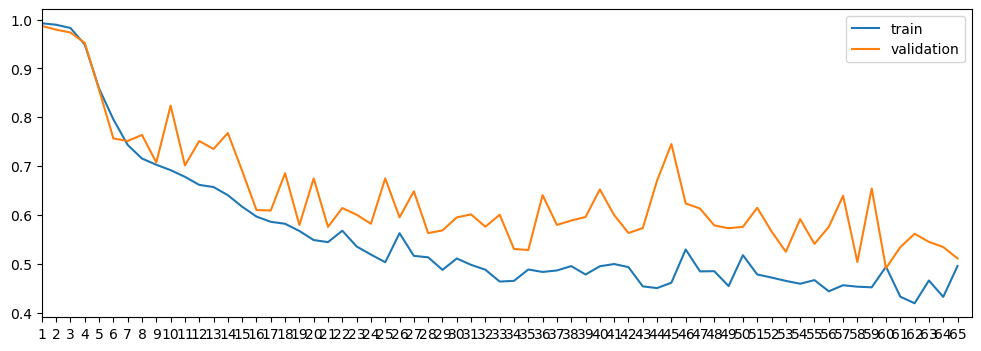

Epoch:65 Training Loss:0.49536617658177784 Validation Loss:0.5109622383924023: 100%|██████████| 65/65 [31:32<00:00, 29.12s/it]


In [59]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/NODeletion128FLAIR.pt")

In [34]:
model=assignPretrainedModel(device,"./Modelos3DUNET/NODeletion128FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.3706018639794438
IOU: tensor(0.2760, device='cuda:0')
Precision: tensor(0.4406, device='cuda:0')
Recall: tensor(0.3871, device='cuda:0')
Accuracy: tensor(0.9990, device='cuda:0')


In [27]:
transform, transform_label=transform_setter(128,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,30,False)
model=assignPretrainedModel(device,"./Modelos3DUNET/NODeletion128FLAIR.pt")
calculate_metrics(model,train_dl, device)
print("val")
calculate_metrics(model,val_dl, device)

2934
646
Dice coefficient: 0.43631180496708555
IOU: tensor(0.3349, device='cuda:0')
Precision: tensor(0.5333, device='cuda:0')
Recall: tensor(0.4527, device='cuda:0')
Accuracy: tensor(0.9990, device='cuda:0')
val
Dice coefficient: 0.47075732912741264
IOU: tensor(0.3446, device='cuda:0')
Precision: tensor(0.5587, device='cuda:0')
Recall: tensor(0.4708, device='cuda:0')
Accuracy: tensor(0.9984, device='cuda:0')


In [30]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,30,False)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,False)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2934
646


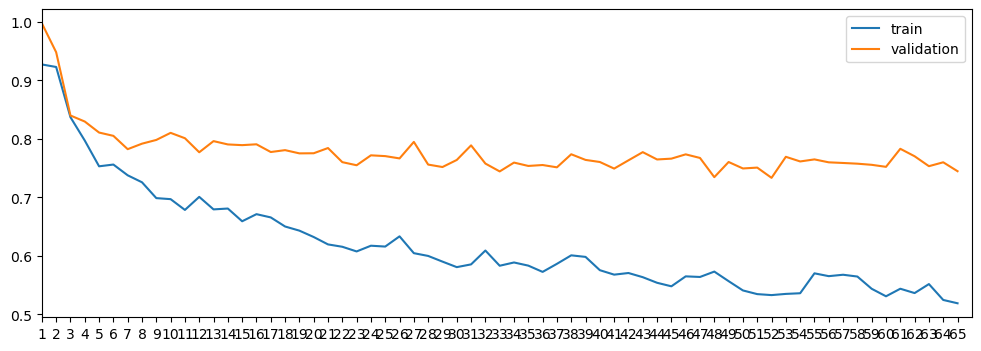

Epoch:65 Training Loss:0.5189562730248405 Validation Loss:0.7448052231558925: 100%|██████████| 65/65 [31:57<00:00, 29.51s/it]


In [62]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/NODeletion128T1.pt")

In [31]:
model=assignPretrainedModel(device,"./Modelos3DUNET/NODeletion128T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.18172277054789487
IOU: tensor(0.1251, device='cuda:0')
Precision: tensor(0.1924, device='cuda:0')
Recall: tensor(0.2084, device='cuda:0')
Accuracy: tensor(0.9985, device='cuda:0')


In [28]:
transform, transform_label=transform_setter(128,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,30,False)
model=assignPretrainedModel(device,"./Modelos3DUNET/NODeletion128T1.pt")
calculate_metrics(model,train_dl, device)
print("val")
calculate_metrics(model,val_dl, device)

2934
646
Dice coefficient: 0.2557899787898194
IOU: tensor(0.1809, device='cuda:0')
Precision: tensor(0.2534, device='cuda:0')
Recall: tensor(0.2852, device='cuda:0')
Accuracy: tensor(0.9986, device='cuda:0')
val
Dice coefficient: 0.2647755179616829
IOU: tensor(0.1882, device='cuda:0')
Precision: tensor(0.2866, device='cuda:0')
Recall: tensor(0.2840, device='cuda:0')
Accuracy: tensor(0.9978, device='cuda:0')


# Modelo sin el 20% de los slices:

In [35]:
transform, transform_label=transform_setter(128,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,30,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29,shuffle=False)

2311
514


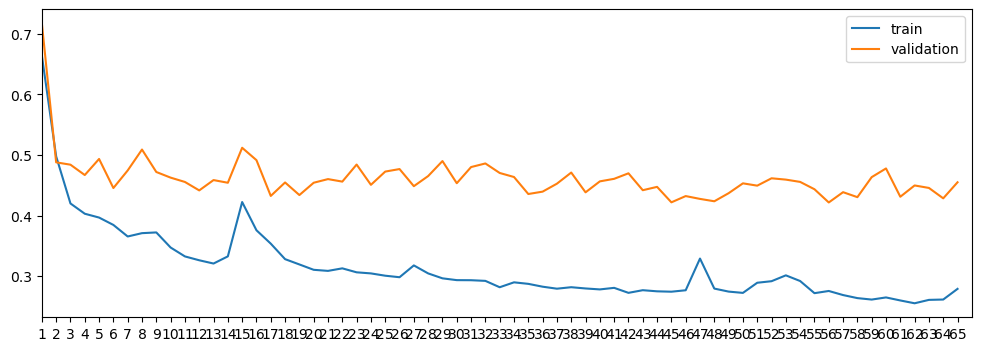

Epoch:65 Training Loss:0.27919727080639956 Validation Loss:0.45506661065186926: 100%|██████████| 65/65 [25:23<00:00, 23.44s/it]


In [65]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Deletion128FLAIR.pt")

In [36]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Deletion128FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.4680237546415089
IOU: tensor(0.3591, device='cuda:0')
Precision: tensor(0.5340, device='cuda:0')
Recall: tensor(0.4979, device='cuda:0')
Accuracy: tensor(0.9988, device='cuda:0')


In [29]:
transform, transform_label=transform_setter(128,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,30,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/Deletion128FLAIR.pt")
calculate_metrics(model,train_dl, device)
print("val")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.5190043214273222
IOU: tensor(0.4095, device='cuda:0')
Precision: tensor(0.6342, device='cuda:0')
Recall: tensor(0.5454, device='cuda:0')
Accuracy: tensor(0.9989, device='cuda:0')
val
Dice coefficient: 0.5815720549888082
IOU: tensor(0.4407, device='cuda:0')
Precision: tensor(0.7049, device='cuda:0')
Recall: tensor(0.5706, device='cuda:0')
Accuracy: tensor(0.9980, device='cuda:0')


In [37]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,30,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


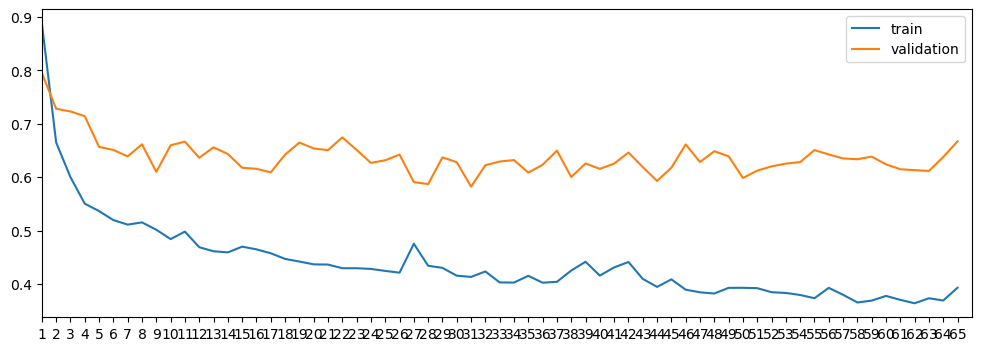

Epoch:65 Training Loss:0.3928702936600089 Validation Loss:0.6669611046281557: 100%|██████████| 65/65 [25:22<00:00, 23.43s/it] 


In [68]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Deletion128T1.pt")

In [38]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Deletion128T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.3381187446724124
IOU: tensor(0.2305, device='cuda:0')
Precision: tensor(0.3859, device='cuda:0')
Recall: tensor(0.3475, device='cuda:0')
Accuracy: tensor(0.9983, device='cuda:0')


In [31]:
transform, transform_label=transform_setter(128,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,30,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/Deletion128T1.pt")
calculate_metrics(model,train_dl, device)
print("val")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.42804313830968627
IOU: tensor(0.3043, device='cuda:0')
Precision: tensor(0.4760, device='cuda:0')
Recall: tensor(0.4170, device='cuda:0')
Accuracy: tensor(0.9986, device='cuda:0')
val
Dice coefficient: 0.4280013425482644
IOU: tensor(0.3008, device='cuda:0')
Precision: tensor(0.5262, device='cuda:0')
Recall: tensor(0.3915, device='cuda:0')
Accuracy: tensor(0.9977, device='cuda:0')


# Modelos con Resize 

Se asume que sin los slices el modelo es mejor(Pendiente de los resultados)

## 128x128 

In [136]:
transform, transform_label=transform_setter(128,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,30,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


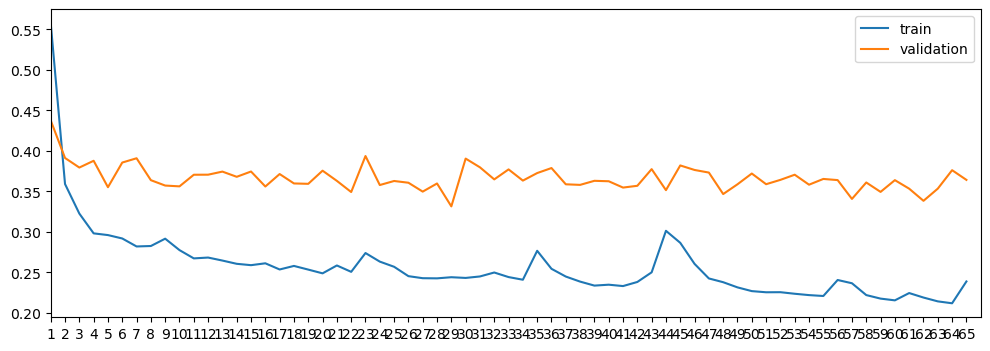

Epoch:65 Training Loss:0.23868615256699535 Validation Loss:0.3641761832421719: 100%|██████████| 65/65 [25:22<00:00, 23.43s/it]


In [71]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/RESIZE/Resize128FLAIR.pt")

In [137]:
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize128FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.3870374866187094
IOU: tensor(0.2956, device='cuda:0')
Hausdorff Distance: 0.0
Precision: tensor(0.4202, device='cuda:0')
Recall: tensor(0.4276, device='cuda:0')
Accuracy: tensor(0.8142, device='cuda:0')


In [138]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,30,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


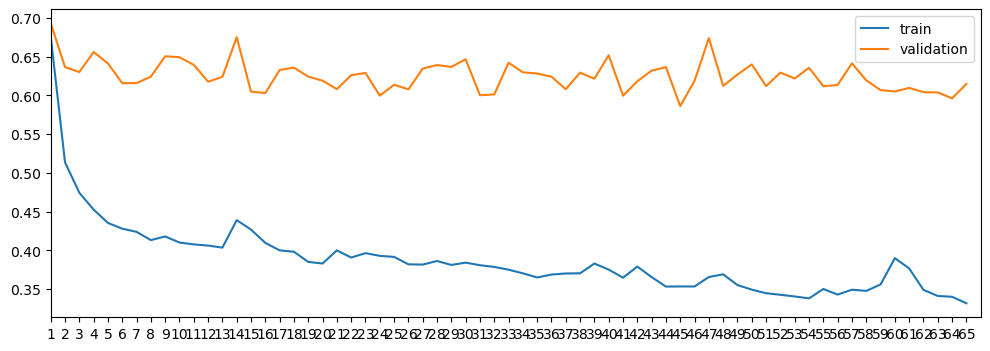

Epoch:65 Training Loss:0.3315331227937885 Validation Loss:0.6149533975291193: 100%|██████████| 65/65 [25:27<00:00, 23.50s/it] 


In [74]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/RESIZE/Resize128T1.pt")

In [139]:
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize128T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.2419345638869345
IOU: tensor(0.1661, device='cuda:0')
Hausdorff Distance: 0.0
Precision: tensor(0.2729, device='cuda:0')
Recall: tensor(0.2648, device='cuda:0')
Accuracy: tensor(0.8492, device='cuda:0')


## 256 x 256

In [39]:
transform, transform_label=transform_setter(256,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


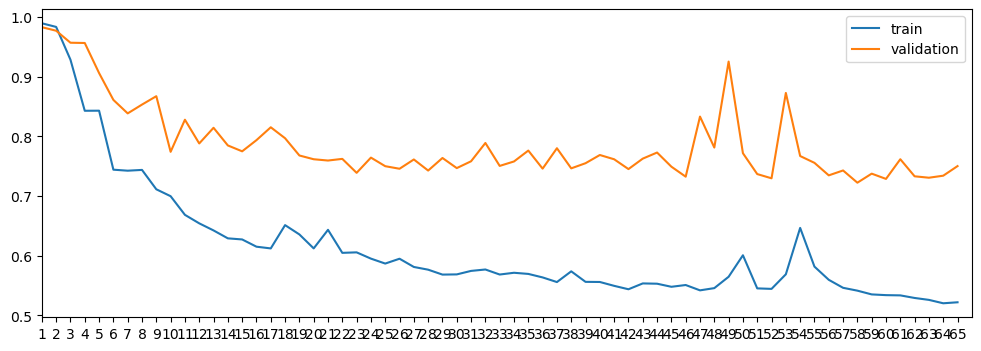

Epoch:65 Training Loss:0.521829226353854 Validation Loss:0.7502881966082174: 100%|██████████| 65/65 [1:28:10<00:00, 81.39s/it]


In [13]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/RESIZE/Resize256FLAIR.pt")

In [40]:
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize256FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.2160966043782299
IOU: tensor(0.1592, device='cuda:0')
Precision: tensor(0.2609, device='cuda:0')
Recall: tensor(0.4445, device='cuda:0')
Accuracy: tensor(0.9924, device='cuda:0')


In [50]:
transform, transform_label=transform_setter(256,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize256FLAIR.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.27754256773105007
IOU: tensor(0.2131, device='cuda:0')
Precision: tensor(0.2864, device='cuda:0')
Recall: tensor(0.4004, device='cuda:0')
Accuracy: tensor(0.9944, device='cuda:0')


In [41]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label, False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


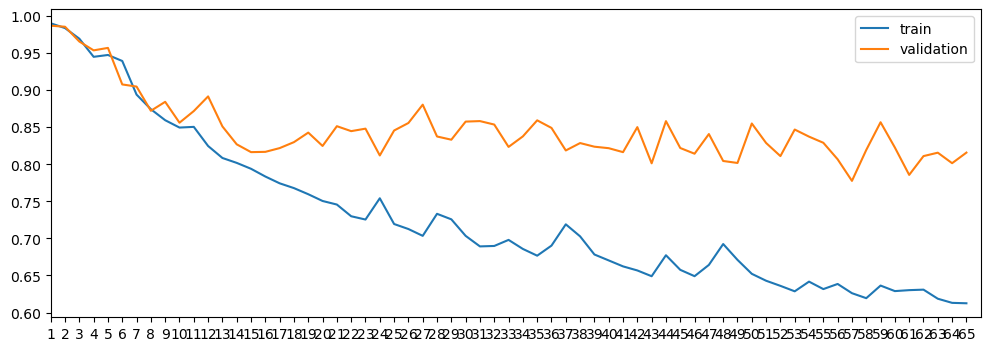

Epoch:65 Training Loss:0.6124501564837799 Validation Loss:0.8157876502413118: 100%|██████████| 65/65 [1:28:12<00:00, 81.42s/it]


In [15]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/RESIZE/Resize256T1.pt")

In [42]:
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize256T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.18430476665143744
IOU: tensor(0.1211, device='cuda:0')
Precision: tensor(0.2557, device='cuda:0')
Recall: tensor(0.1687, device='cuda:0')
Accuracy: tensor(0.9981, device='cuda:0')


In [51]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label, False,15,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize256T1.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.22236302238515745
IOU: tensor(0.1496, device='cuda:0')
Precision: tensor(0.3018, device='cuda:0')
Recall: tensor(0.1856, device='cuda:0')
Accuracy: tensor(0.9971, device='cuda:0')


## 384 x 384

In [53]:
transform, transform_label=transform_setter(384,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,7,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


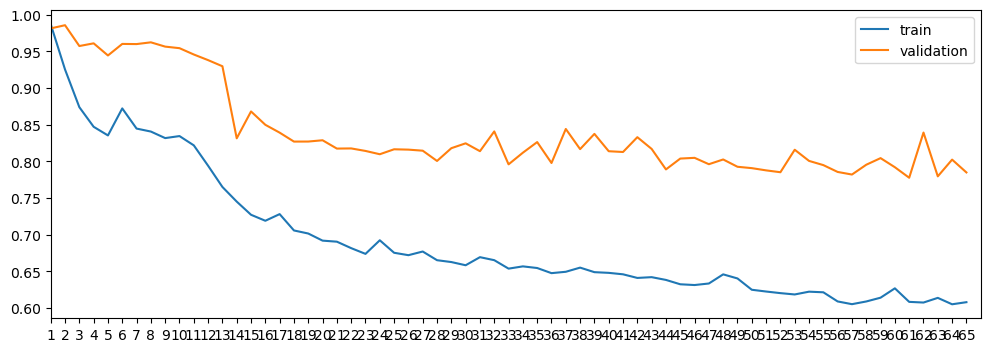

Epoch:65 Training Loss:0.6078835335130188 Validation Loss:0.7847929960223489: 100%|██████████| 65/65 [3:18:00<00:00, 182.77s/it]


In [12]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/RESIZE/Resize384FLAIR.pt")

In [12]:
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize384FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.18028601108370318
IOU: tensor(0.1321, device='cuda:0')
Precision: tensor(0.2409, device='cuda:0')
Recall: tensor(0.2931, device='cuda:0')
Accuracy: tensor(0.9946, device='cuda:0')


In [52]:
transform, transform_label=transform_setter(384,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,7,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize384FLAIR.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.22245644633836878
IOU: tensor(0.1694, device='cuda:0')
Precision: tensor(0.2563, device='cuda:0')
Recall: tensor(0.2806, device='cuda:0')
Accuracy: tensor(0.9950, device='cuda:0')


In [ ]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label, False,7,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


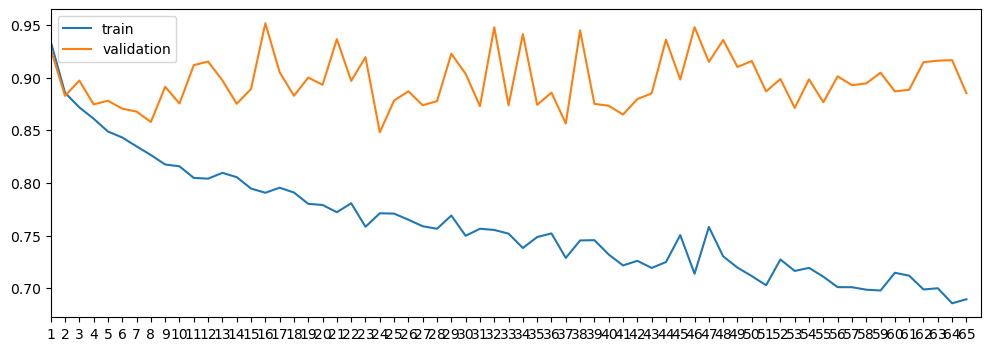

Epoch:65 Training Loss:0.6895356822278993 Validation Loss:0.8851277887104192: 100%|██████████| 65/65 [3:18:30<00:00, 183.24s/it]


In [15]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/RESIZE/Resize384T1.pt")

In [14]:
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize384T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.10868390345887258
IOU: tensor(0.0696, device='cuda:0')
Precision: tensor(0.1507, device='cuda:0')
Recall: tensor(0.1033, device='cuda:0')
Accuracy: tensor(0.9980, device='cuda:0')


In [53]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label, False,7,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize384T1.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.1519036561500315
IOU: tensor(0.1015, device='cuda:0')
Precision: tensor(0.2148, device='cuda:0')
Recall: tensor(0.1366, device='cuda:0')
Accuracy: tensor(0.9969, device='cuda:0')


## 200 x 200

In [12]:
model = UNet(in_channels=1,out_channels=1, init_features=32, is200pad=True,is200crop=False)
model=model.to(device)

In [55]:
transform, transform_label=transform_setter(200,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


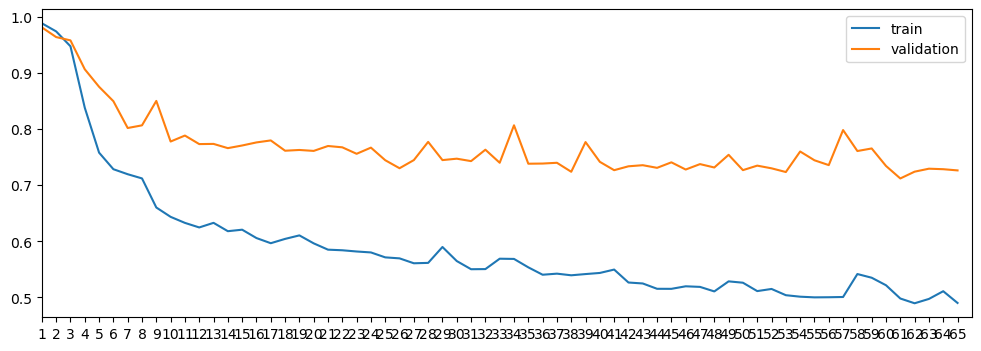

Epoch:65 Training Loss:0.490228610269485 Validation Loss:0.7264737258780394: 100%|██████████| 65/65 [57:38<00:00, 53.20s/it] 


In [56]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/RESIZE/Resize200FLAIRpad.pt")

In [45]:
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize200FLAIRpad.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.25704245887064825
IOU: tensor(0.1885, device='cuda:0')
Precision: tensor(0.3056, device='cuda:0')
Recall: tensor(0.3874, device='cuda:0')
Accuracy: tensor(0.9968, device='cuda:0')


In [56]:
transform, transform_label=transform_setter(200,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,15,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize200FLAIRpad.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.28788411530735214
IOU: tensor(0.2149, device='cuda:0')
Precision: tensor(0.3424, device='cuda:0')
Recall: tensor(0.3206, device='cuda:0')
Accuracy: tensor(0.9972, device='cuda:0')


In [46]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


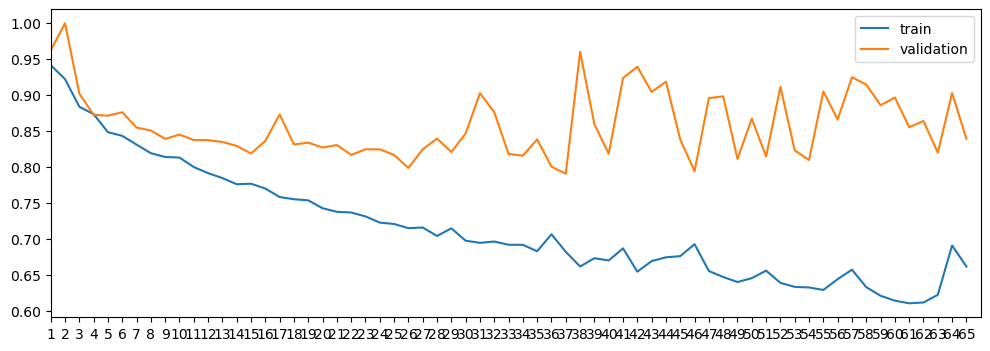

Epoch:65 Training Loss:0.6619031471590842 Validation Loss:0.8393915439725385: 100%|██████████| 65/65 [59:24<00:00, 54.84s/it]


In [37]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/RESIZE/Resize200T1pad.pt")

In [47]:
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize200T1pad.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.17155857685545603
IOU: tensor(0.1104, device='cuda:0')
Precision: tensor(0.2217, device='cuda:0')
Recall: tensor(0.1915, device='cuda:0')
Accuracy: tensor(0.9979, device='cuda:0')


In [57]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize200T1pad.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.2090829511613168
IOU: tensor(0.1434, device='cuda:0')
Precision: tensor(0.2353, device='cuda:0')
Recall: tensor(0.2157, device='cuda:0')
Accuracy: tensor(0.9969, device='cuda:0')


In [14]:
model = UNet(in_channels=1,out_channels=1, init_features=32, is200pad=False,is200crop=True)
model=model.to(device)

In [49]:
transform, transform_label=transform_setter(200,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


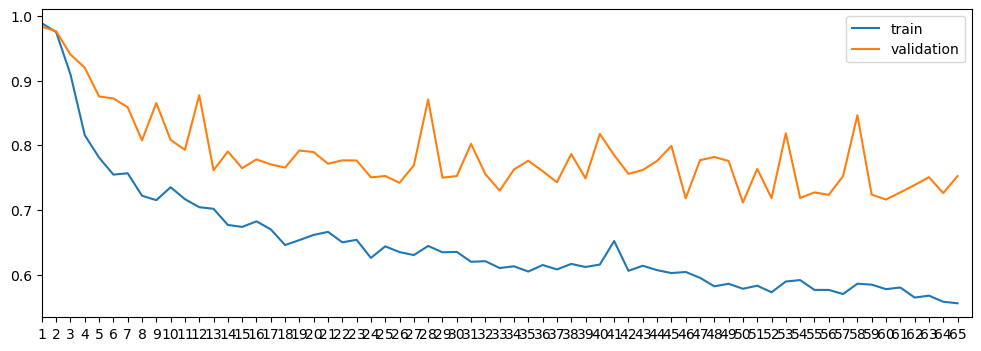

Epoch:65 Training Loss:0.5557551899263936 Validation Loss:0.7524185538142478: 100%|██████████| 65/65 [1:04:29<00:00, 59.53s/it]


In [41]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/RESIZE/Resize200FLAIRcrop.pt")

In [50]:
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize200FLAIRcrop.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.2627108783955686
IOU: tensor(0.1887, device='cuda:0')
Precision: tensor(0.3748, device='cuda:0')
Recall: tensor(0.3433, device='cuda:0')
Accuracy: tensor(0.9978, device='cuda:0')


In [59]:
transform, transform_label=transform_setter(200,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,15,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize200FLAIRcrop.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.2885134599328146
IOU: tensor(0.2152, device='cuda:0')
Precision: tensor(0.4308, device='cuda:0')
Recall: tensor(0.3006, device='cuda:0')
Accuracy: tensor(0.9973, device='cuda:0')


In [51]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


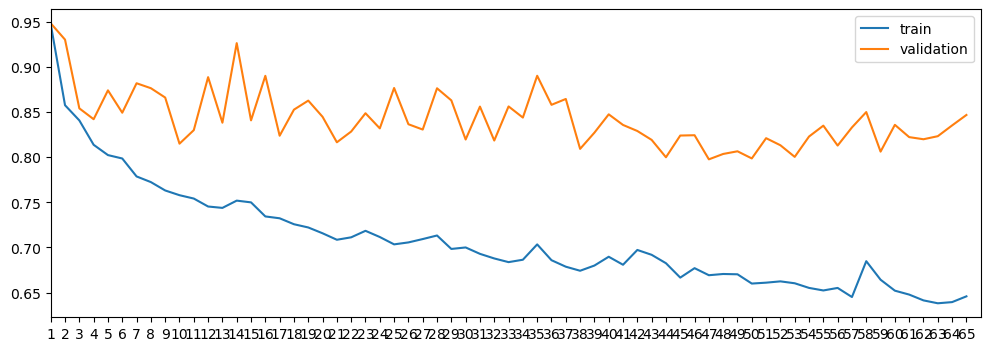

Epoch:65 Training Loss:0.6457715630531311 Validation Loss:0.846815481841137: 100%|██████████| 65/65 [1:04:24<00:00, 59.45s/it] 


In [44]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/RESIZE/Resize200T1crop.pt")

In [52]:
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize200T1crop.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.1914536612978744
IOU: tensor(0.1290, device='cuda:0')
Precision: tensor(0.2250, device='cuda:0')
Recall: tensor(0.2173, device='cuda:0')
Accuracy: tensor(0.9980, device='cuda:0')


In [15]:
transform, transform_label=transform_setter(200,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize200T1crop.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.20236893324885952
IOU: tensor(0.1396, device='cuda:0')
Precision: tensor(0.2713, device='cuda:0')
Recall: tensor(0.1945, device='cuda:0')
Accuracy: tensor(0.9969, device='cuda:0')


# Modelos con Crop/Pad

## 200 x 200

CROP MEJOR

In [16]:
model = UNet(in_channels=1,out_channels=1, init_features=32, is200pad=False,is200crop=True)
model=model.to(device)

In [41]:
transform, transform_label=transform_setter(200,False)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


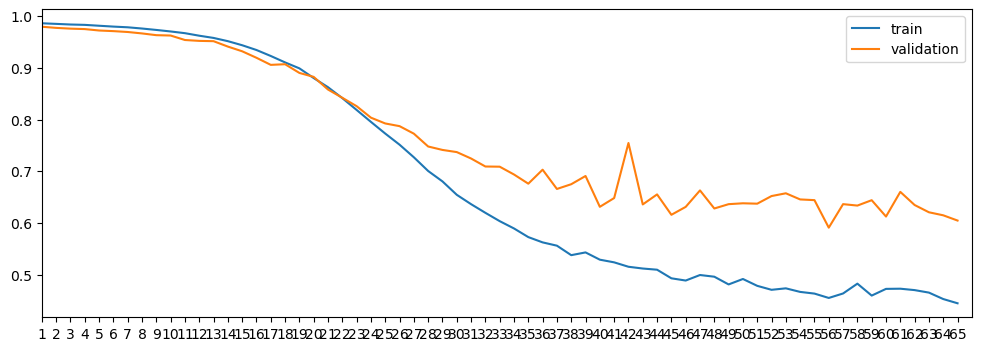

Epoch:65 Training Loss:0.44429534865963843 Validation Loss:0.6044571377218159: 100%|██████████| 65/65 [1:04:46<00:00, 59.80s/it]


In [175]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/CROP/Crop200FLAIR.pt")

In [42]:
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop200FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.3849895720944087
IOU: tensor(0.2982, device='cuda:0')
Precision: tensor(0.5204, device='cuda:0')
Recall: tensor(0.4194, device='cuda:0')
Accuracy: tensor(0.9982, device='cuda:0')


In [17]:
transform, transform_label=transform_setter(200,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,15,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop200FLAIR.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.3489333190377303
IOU: tensor(0.2529, device='cuda:0')
Precision: tensor(0.5787, device='cuda:0')
Recall: tensor(0.3418, device='cuda:0')
Accuracy: tensor(0.9974, device='cuda:0')


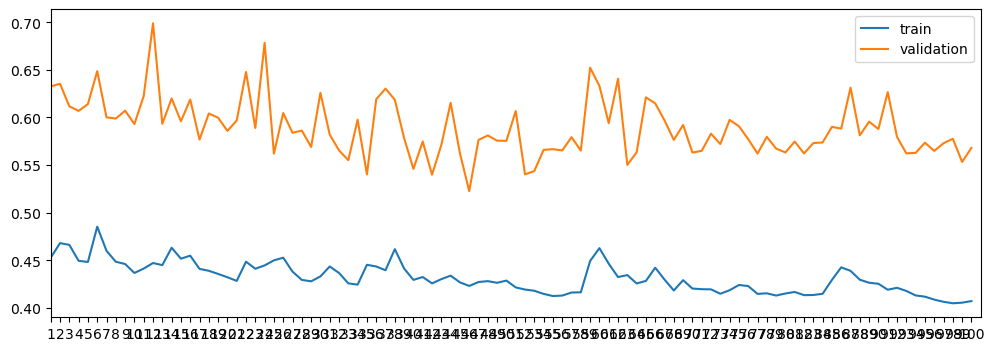

Epoch:100 Training Loss:0.4071638153445336 Validation Loss:0.5681080813068957: 100%|██████████| 100/100 [1:40:35<00:00, 60.36s/it]


In [177]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/CROP/Crop200FLAIR100.pt")

In [178]:
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop200FLAIR100.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.32601209665092934
IOU: tensor(0.2383, device='cuda:0')
Hausdorff Distance: 0.0
Precision: tensor(0.4008, device='cuda:0')
Recall: tensor(0.3415, device='cuda:0')
Accuracy: tensor(0.1304, device='cuda:0')


In [62]:
transform, transform_label=transform_setter(200,False)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,15,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop200FLAIR100.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.47735656116689956
IOU: tensor(0.3642, device='cuda:0')
Precision: tensor(0.6588, device='cuda:0')
Recall: tensor(0.4691, device='cuda:0')
Accuracy: tensor(0.9972, device='cuda:0')


In [43]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label, False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


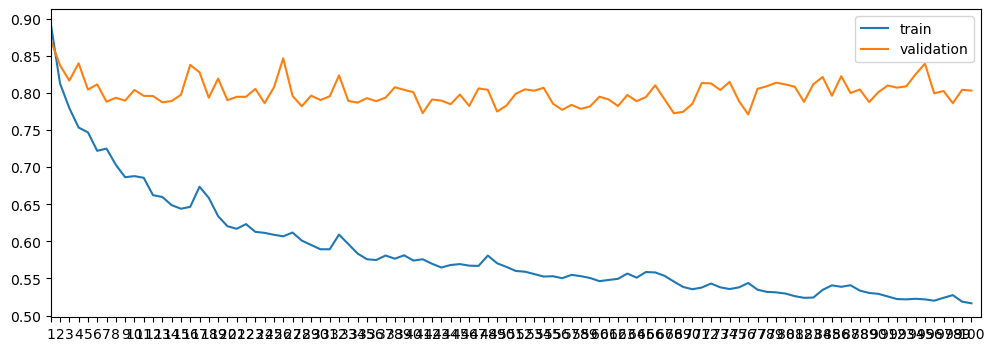

Epoch:100 Training Loss:0.5165437763737094 Validation Loss:0.8032787817651785: 100%|██████████| 100/100 [1:40:31<00:00, 60.31s/it]


In [180]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/CROP/Crop200T1.pt")

In [44]:
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop200T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.2044150699181505
IOU: tensor(0.1398, device='cuda:0')
Precision: tensor(0.2751, device='cuda:0')
Recall: tensor(0.1888, device='cuda:0')
Accuracy: tensor(0.9977, device='cuda:0')


In [63]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label, False,15,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop200T1.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.22890752958561253
IOU: tensor(0.1593, device='cuda:0')
Precision: tensor(0.3018, device='cuda:0')
Recall: tensor(0.1994, device='cuda:0')
Accuracy: tensor(0.9962, device='cuda:0')


## 240 x240

In [64]:
model = UNet(in_channels=1,out_channels=1, init_features=32)
model=model.to(device)

In [46]:
transform, transform_label=transform_setter(240,False)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


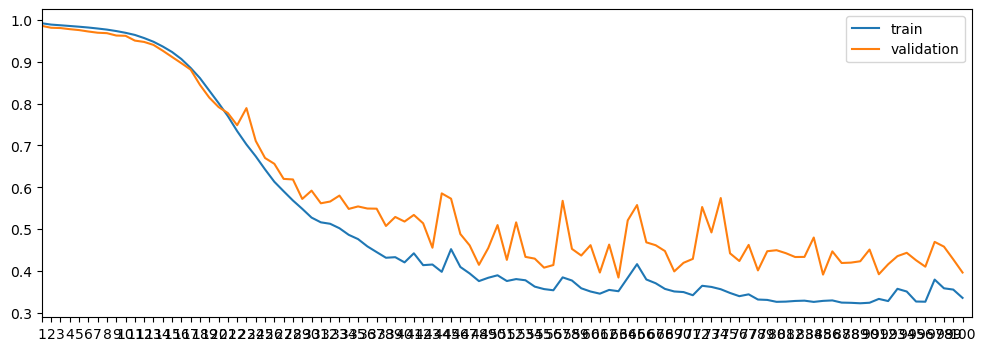

Epoch:100 Training Loss:0.33608962951167937 Validation Loss:0.3966346077651867: 100%|██████████| 100/100 [2:09:10<00:00, 77.50s/it]


In [17]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/CROP/Crop240FLAIR.pt")

In [47]:
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop240FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.5531171161656987
IOU: tensor(0.4488, device='cuda:0')
Precision: tensor(0.6655, device='cuda:0')
Recall: tensor(0.5342, device='cuda:0')
Accuracy: tensor(0.9992, device='cuda:0')


In [65]:
transform, transform_label=transform_setter(240,False)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,15,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop240FLAIR.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.6153783082962037
IOU: tensor(0.4862, device='cuda:0')
Precision: tensor(0.7450, device='cuda:0')
Recall: tensor(0.5480, device='cuda:0')
Accuracy: tensor(0.9988, device='cuda:0')


In [48]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


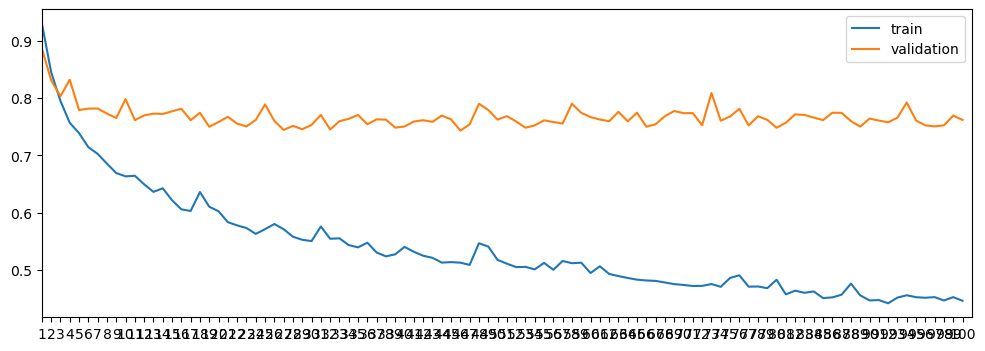

Epoch:100 Training Loss:0.4465693700698114 Validation Loss:0.7617159340779408: 100%|██████████| 100/100 [2:09:09<00:00, 77.50s/it]


In [20]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/CROP/Crop240T1.pt")

In [49]:
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop240T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.23888010405932228
IOU: tensor(0.1665, device='cuda:0')
Precision: tensor(0.3178, device='cuda:0')
Recall: tensor(0.2112, device='cuda:0')
Accuracy: tensor(0.9985, device='cuda:0')


In [66]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop240T1.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.2568713026596552
IOU: tensor(0.1841, device='cuda:0')
Precision: tensor(0.3236, device='cuda:0')
Recall: tensor(0.2251, device='cuda:0')
Accuracy: tensor(0.9976, device='cuda:0')


## 256 x 256

In [50]:
transform, transform_label=transform_setter(256,False)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


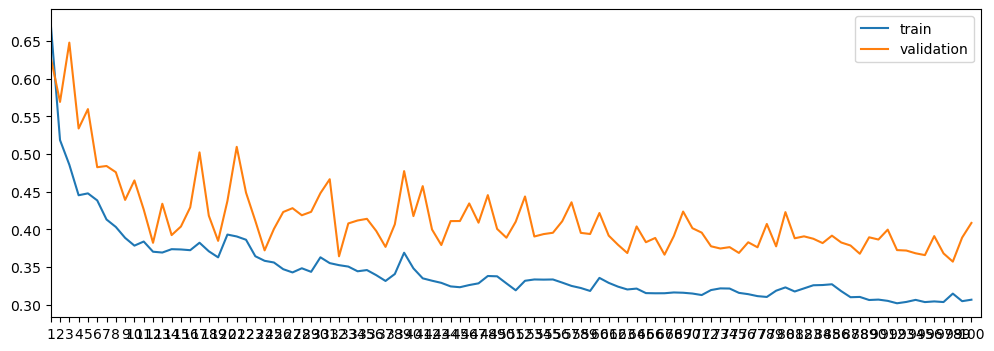

Epoch:100 Training Loss:0.306595306627212 Validation Loss:0.4084804055300735: 100%|██████████| 100/100 [2:25:22<00:00, 87.23s/it]


In [23]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/CROP/Crop256FLAIR.pt")

In [51]:
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop256FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.5636361556119744
IOU: tensor(0.4578, device='cuda:0')
Precision: tensor(0.6469, device='cuda:0')
Recall: tensor(0.5789, device='cuda:0')
Accuracy: tensor(0.9993, device='cuda:0')


In [67]:
transform, transform_label=transform_setter(256,False)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,15,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop256FLAIR.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.6428852847644261
IOU: tensor(0.5102, device='cuda:0')
Precision: tensor(0.7269, device='cuda:0')
Recall: tensor(0.6057, device='cuda:0')
Accuracy: tensor(0.9990, device='cuda:0')


In [52]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


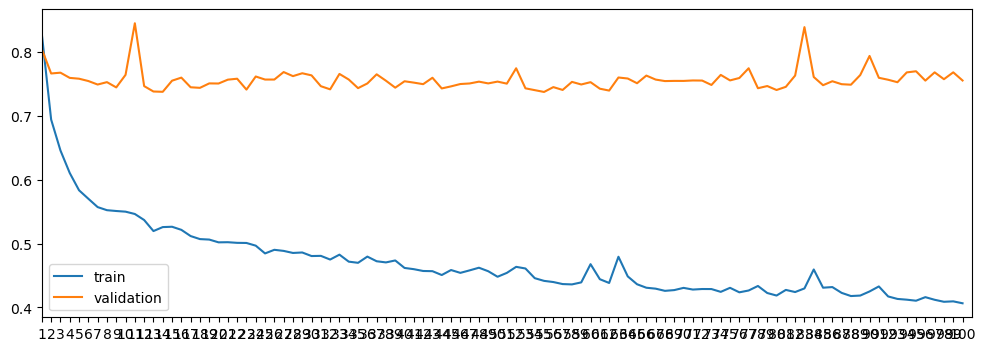

Epoch:100 Training Loss:0.40637190341949464 Validation Loss:0.7556499802766355: 100%|██████████| 100/100 [2:21:27<00:00, 84.88s/it]


In [26]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/CROP/Crop256T1.pt")

In [53]:
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop256T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.24095307486307763
IOU: tensor(0.1668, device='cuda:0')
Precision: tensor(0.3374, device='cuda:0')
Recall: tensor(0.2082, device='cuda:0')
Accuracy: tensor(0.9987, device='cuda:0')


In [68]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop256T1.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.26232118293499934
IOU: tensor(0.1854, device='cuda:0')
Precision: tensor(0.3425, device='cuda:0')
Recall: tensor(0.2269, device='cuda:0')
Accuracy: tensor(0.9978, device='cuda:0')


## 384 x 384

In [10]:
transform, transform_label=transform_setter(384,False)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,7,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


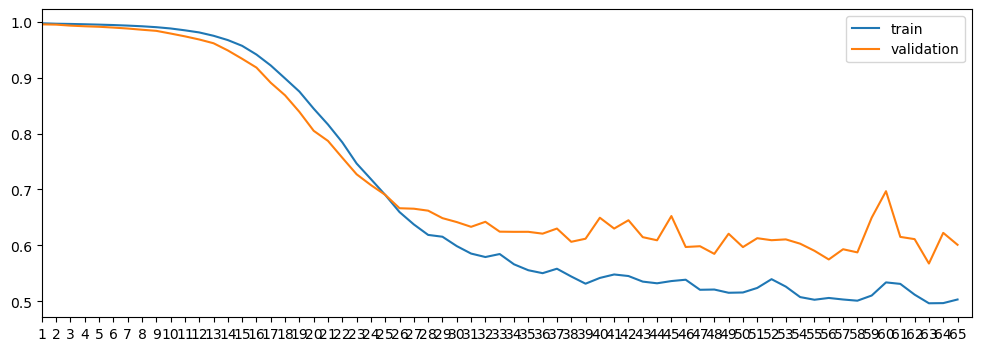

Epoch:65 Training Loss:0.5035260894147291 Validation Loss:0.6012212911656315: 100%|██████████| 65/65 [3:20:23<00:00, 184.98s/it] 


In [12]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/CROP/Crop384FLAIR.pt")

In [11]:
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop384FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.41639925510485737
IOU: tensor(0.3215, device='cuda:0')
Precision: tensor(0.5170, device='cuda:0')
Recall: tensor(0.4470, device='cuda:0')
Accuracy: tensor(0.9996, device='cuda:0')


In [12]:
transform, transform_label=transform_setter(384,False)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,7,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop384FLAIR.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.4322393402355885
IOU: tensor(0.3335, device='cuda:0')
Precision: tensor(0.5027, device='cuda:0')
Recall: tensor(0.4328, device='cuda:0')
Accuracy: tensor(0.9994, device='cuda:0')


In [ ]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,7,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


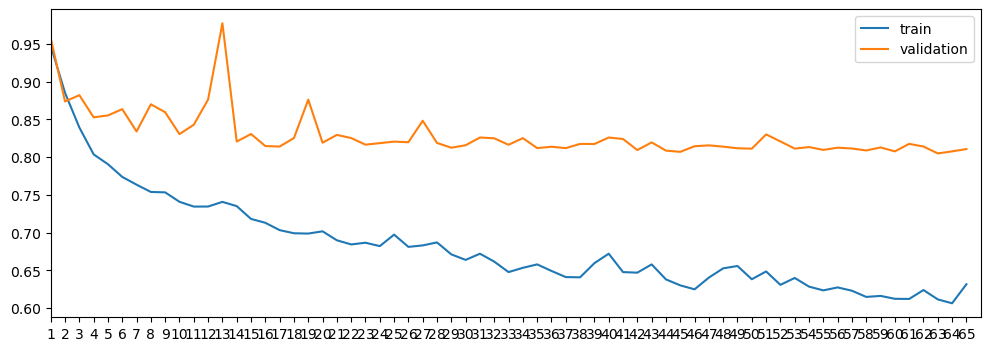

Epoch:65 Training Loss:0.6316726184323475 Validation Loss:0.8107886747356172: 100%|██████████| 65/65 [3:23:10<00:00, 187.55s/it]


In [15]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/CROP/Crop384T1.pt")

In [ ]:
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop384T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.1726276970270722
IOU: tensor(0.1178, device='cuda:0')
Precision: tensor(0.2357, device='cuda:0')
Recall: tensor(0.1610, device='cuda:0')
Accuracy: tensor(0.9994, device='cuda:0')


In [13]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,7,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop384T1.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.1950065763656517
IOU: tensor(0.1397, device='cuda:0')
Precision: tensor(0.2586, device='cuda:0')
Recall: tensor(0.1718, device='cuda:0')
Accuracy: tensor(0.9990, device='cuda:0')


# Modelos con Normalizacion

Se asume un tamaño con Reize de 256x256(pendiente resultados)
Se asume un tamaño con Crop and Pad de 200x200(pendiente resultados)

## Gaussian Normalization Resize 256x256

- 1: Gaussian normalization
- 3: Gaussian Normalization cerebro
- 5: gaussian normalization del cerebro completo

In [32]:
transform, transform_label=transform_normalization(256,True,1)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=, shuffle=False)

2311
514


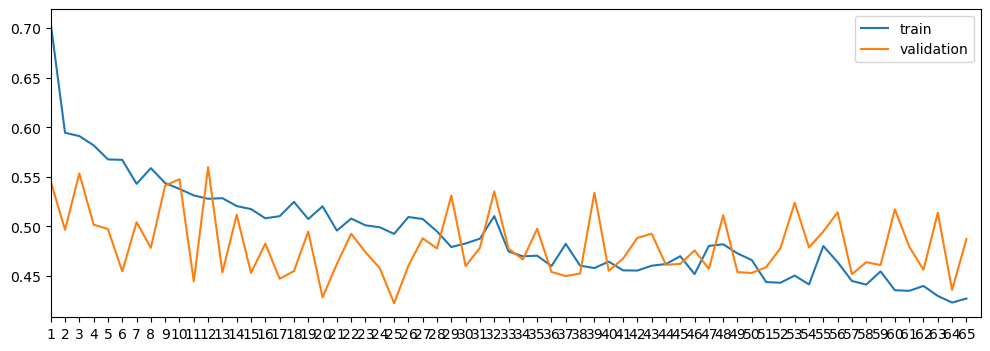

Epoch:65 Training Loss:0.4272668588546015 Validation Loss:0.4873324878069564: 100%|██████████| 65/65 [1:30:44<00:00, 83.76s/it]


In [66]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_RESIZE/GN256FLAIR.pt")

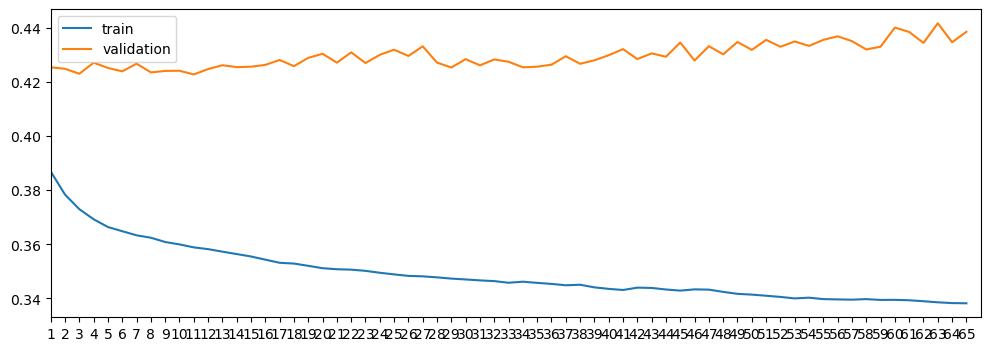

Epoch:65 Training Loss:0.3382336228124557 Validation Loss:0.4384429684066739: 100%|██████████| 65/65 [1:32:00<00:00, 84.94s/it]  


In [33]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_RESIZE/GN256FLAIRlr4.pt")

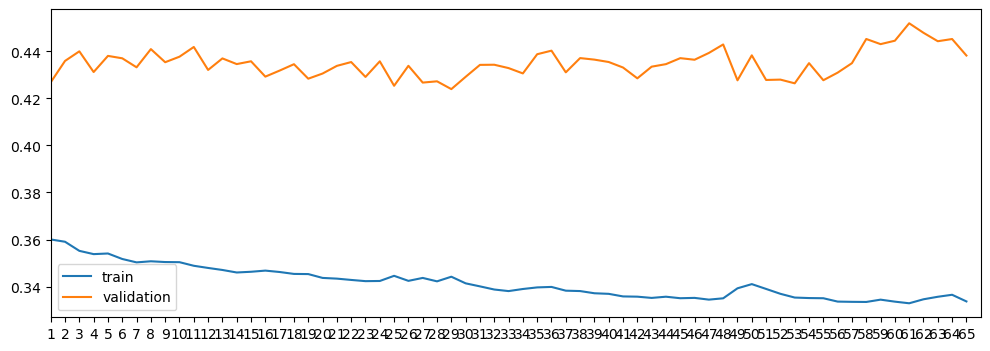

Epoch:65 Training Loss:0.3336930840246139 Validation Loss:0.4382088737084471: 100%|██████████| 65/65 [1:32:08<00:00, 85.06s/it]


In [35]:
epochs = 65
optim = Adam(model.parameters(), lr=0.0002)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_RESIZE/GN256FLAIR0002.pt")

In [67]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_RESIZE/GN256FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.0
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.5413, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [34]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_RESIZE/GN256FLAIRlr4.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.2421939703721651
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.4226, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [36]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_RESIZE/GN256FLAIR0002.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Dice coefficient: 0.2543888839353856
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.4431, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [12]:
transform, transform_label=transform_normalization(256,True,1)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


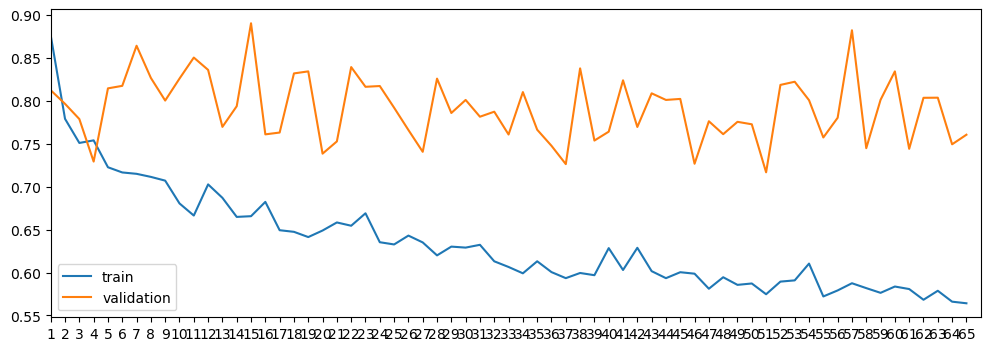

Epoch:65 Training Loss:0.5642118923125728 Validation Loss:0.7602484778189346: 100%|██████████| 65/65 [1:30:49<00:00, 83.84s/it]


In [69]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_RESIZE/GN256T1.pt")

In [70]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_RESIZE/GN256T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.0
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


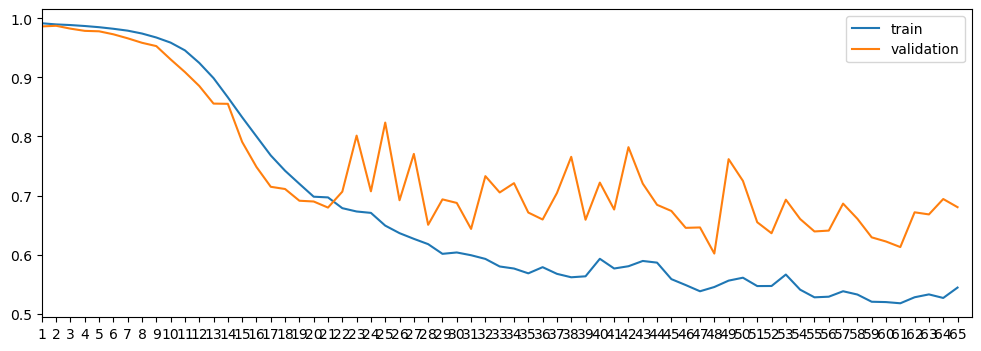

Epoch:65 Training Loss:0.5441224467369818 Validation Loss:0.6802565043309204: 100%|██████████| 65/65 [1:34:31<00:00, 87.25s/it]


In [13]:
epochs = 65
optim = Adam(model.parameters(), lr=0.0002)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_RESIZE/GN256T10002.pt")

In [14]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_RESIZE/GN256T10002.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Dice coefficient: 0.1432589104029926
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [28]:
transform, transform_label=transform_normalization(256,True,3)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


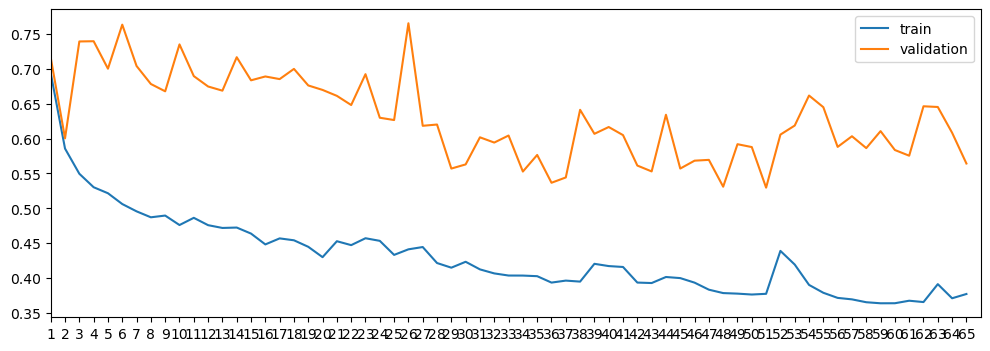

Epoch:65 Training Loss:0.37719703220552014 Validation Loss:0.5641914617834536: 100%|██████████| 65/65 [1:39:33<00:00, 91.90s/it]


In [16]:
epochs = 65
optim = Adam(model.parameters(), lr=0.0002)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_RESIZE/GNMask256FLAIR.pt")

In [17]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_RESIZE/GNMask256FLAIR.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\preprocessing.py:127: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  std=torch.std(image[brain==1])


Dice coefficient: 0.15502504040012258
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.3832, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


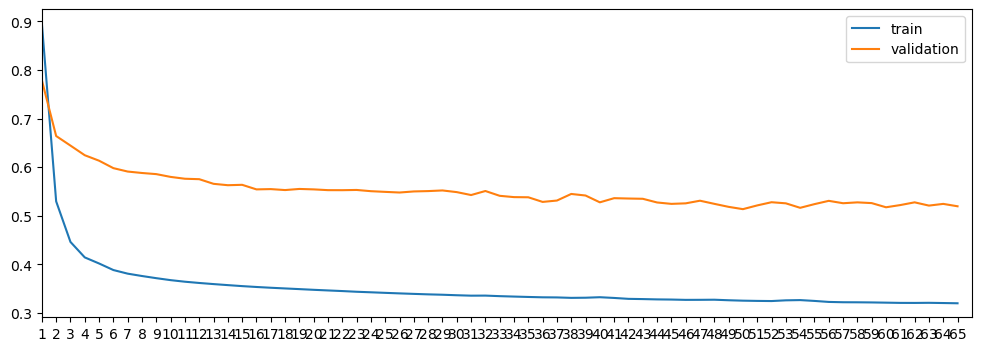

Epoch:65 Training Loss:0.3198143866754347 Validation Loss:0.5193960256768566: 100%|██████████| 65/65 [1:37:11<00:00, 89.72s/it]


In [29]:
epochs = 65
optim = Adam(model.parameters(), lr=0.00002)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_RESIZE/GNMask256FLAIR02.pt")

In [30]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_RESIZE/GNMask256FLAIR02.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.2096182477660477
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.3899, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [31]:
transform, transform_label=transform_normalization(256,True,3)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


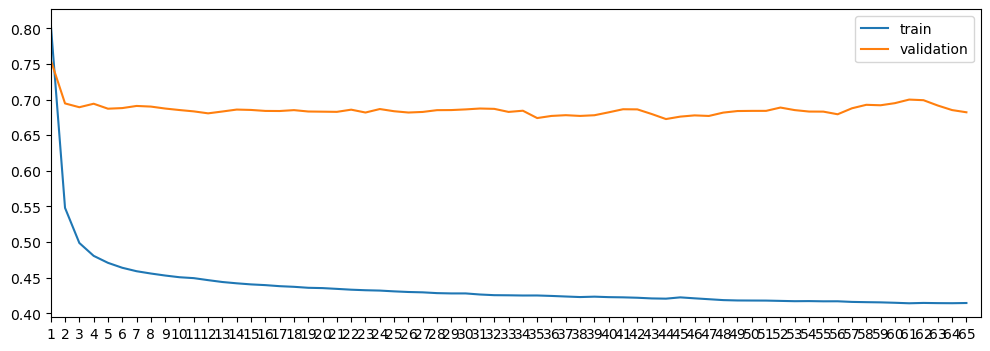

Epoch:65 Training Loss:0.4144139209101277 Validation Loss:0.6821408153823545: 100%|██████████| 65/65 [1:37:07<00:00, 89.65s/it]


In [32]:
epochs = 65
optim = Adam(model.parameters(), lr=0.00002)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_RESIZE/GNMask256T1.pt")

In [34]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_RESIZE/GNMask256T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.10643091979773568
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [35]:
transform, transform_label=transform_normalization(256,True,5)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


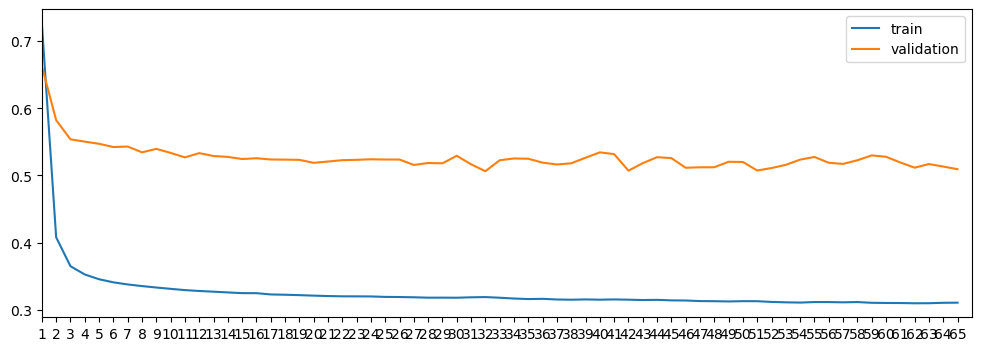

Epoch:65 Training Loss:0.3103890288260675 Validation Loss:0.509324172941598: 100%|██████████| 65/65 [1:43:13<00:00, 95.29s/it] 


In [36]:
epochs = 65
optim = Adam(model.parameters(), lr=0.00002)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_RESIZE/GNFill256FLAIR.pt")

In [37]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_RESIZE/GNFill256FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.22209602917029866
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.3966, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [38]:
transform, transform_label=transform_normalization(256,True,5)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


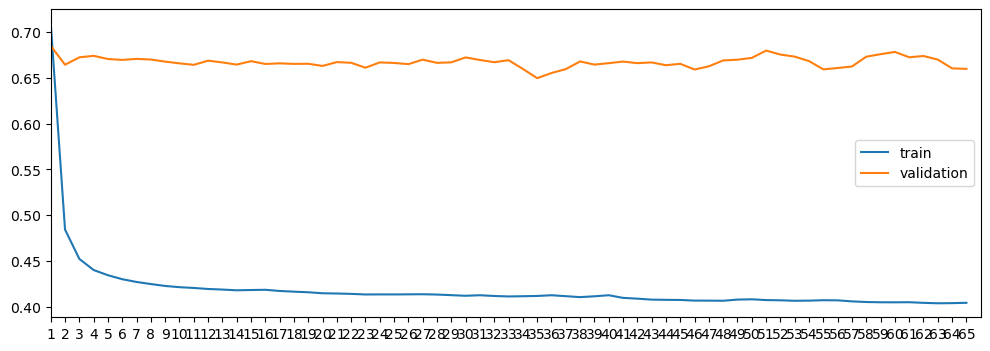

Epoch:65 Training Loss:0.4043501788570035 Validation Loss:0.6597213724539239: 100%|██████████| 65/65 [1:43:33<00:00, 95.59s/it]


In [39]:
epochs = 65
optim = Adam(model.parameters(), lr=0.00002)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_RESIZE/GNFill256T1.pt")

In [40]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_RESIZE/GNFill256T1.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\preprocessing.py:127: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  std=torch.std(image[brain==1])


Dice coefficient: 0.11995184526068012
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


## MINMAX NORMALIZATION RESIZE 256X256

- 2: min max normalization
- 4: min max del cerebro
- 6: minmax del cerebro entero

In [23]:
transform, transform_label=transform_normalization(256,True,2)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


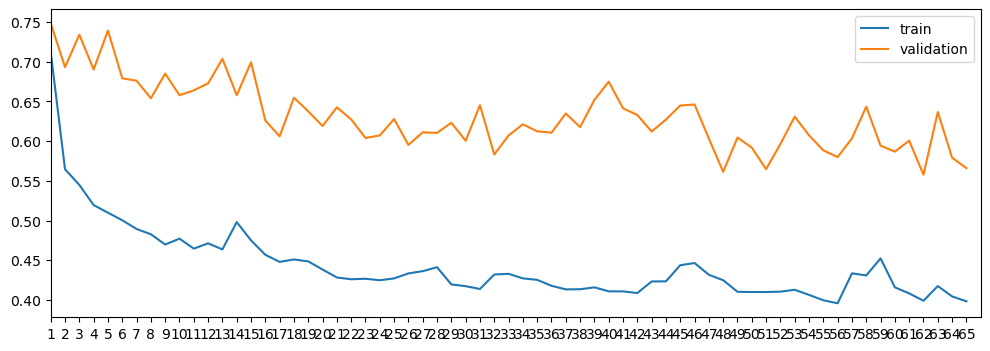

Epoch:65 Training Loss:0.3981597081307442 Validation Loss:0.5659934205133423: 100%|██████████| 65/65 [1:31:41<00:00, 84.64s/it] 


In [24]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_RESIZE/MM256FLAIR.pt")

In [25]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_RESIZE/MM256FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.20378756729187444
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.3933, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [26]:
transform, transform_label=transform_normalization(256,True,2)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


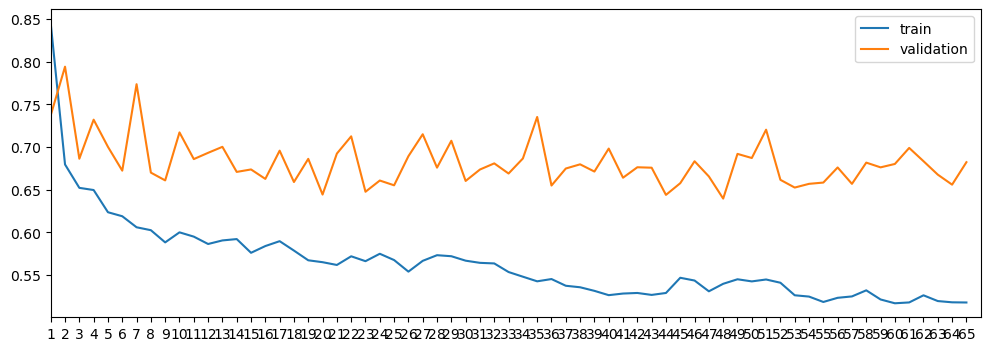

Epoch:65 Training Loss:0.5180127297678302 Validation Loss:0.6822154394175631: 100%|██████████| 65/65 [1:33:06<00:00, 85.94s/it]


In [27]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_RESIZE/MM256T1.pt")

In [28]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_RESIZE/MM256T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.1234064128672655
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [29]:
transform, transform_label=transform_normalization(256,True,4)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


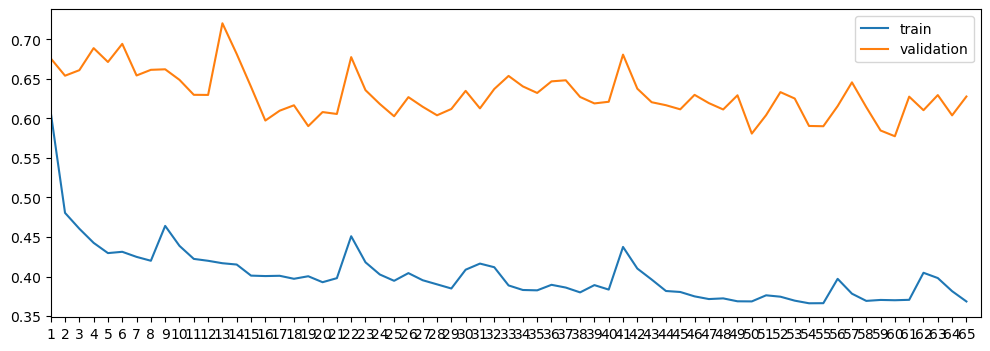

Epoch:65 Training Loss:0.3684891123925486 Validation Loss:0.6276373443359524: 100%|██████████| 65/65 [1:37:48<00:00, 90.28s/it]


In [30]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_RESIZE/MMmask256FLAIR.pt")

In [31]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_RESIZE/MMmask256FLAIR.pt")
calculate_metrics(model,test_dl, device)

RuntimeError: min(): Expected reduction dim to be specified for input.numel() == 0. Specify the reduction dim with the 'dim' argument.

In [ ]:
transform, transform_label=transform_normalization(256,True,4)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

In [ ]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_RESIZE/MMmask256T1.pt")

In [ ]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_RESIZE/MMmask256T1.pt")
calculate_metrics(model,test_dl, device)

In [ ]:
transform, transform_label=transform_normalization(256,True,6)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

In [ ]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_RESIZE/MMFill256FLAIR.pt")

In [ ]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_RESIZE//MMFill256FLAIR.pt")
calculate_metrics(model,test_dl, device)

In [ ]:
transform, transform_label=transform_normalization(256,True,6)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

In [ ]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_RESIZE/MMFill200T1.pt")

In [ ]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_RESIZE/MMFill200T1.pt")
calculate_metrics(model,test_dl, device)

## Gaussian Normalization CropandPad 240 x 240 

In [38]:
model = UNet(in_channels=1,out_channels=1, init_features=32)
model= model.to(device)

In [28]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


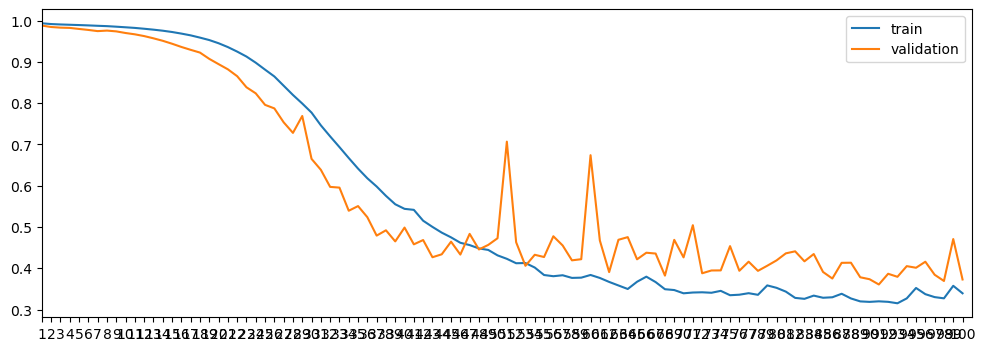

Epoch:100 Training Loss:0.33934510061817785 Validation Loss:0.37282592408464105: 100%|██████████| 100/100 [2:10:41<00:00, 78.42s/it]


In [184]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_CROP/GN240FLAIR.pt")

In [29]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GN240FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.6192617160842562
IOU: tensor(0.5184, device='cuda:0')
Precision: tensor(0.6901, device='cuda:0')
Recall: tensor(0.6307, device='cuda:0')
Accuracy: tensor(0.9993, device='cuda:0')


In [19]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GN240FLAIR.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.6392932723675455
IOU: tensor(0.5252, device='cuda:0')
Precision: tensor(0.7316, device='cuda:0')
Recall: tensor(0.5847, device='cuda:0')
Accuracy: tensor(0.9991, device='cuda:0')


In [30]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


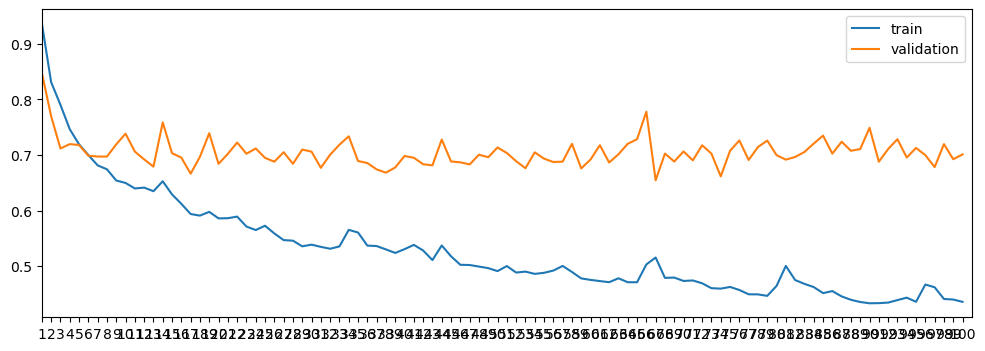

Epoch:100 Training Loss:0.43589559408926193 Validation Loss:0.7008840789056174: 100%|██████████| 100/100 [2:08:29<00:00, 77.09s/it]


In [187]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_CROP/GN240T1.pt")

In [31]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GN240T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.31561551730721477
IOU: tensor(0.2224, device='cuda:0')
Precision: tensor(0.4631, device='cuda:0')
Recall: tensor(0.2814, device='cuda:0')
Accuracy: tensor(0.9986, device='cuda:0')


In [20]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GN240T1.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.345570354996132
IOU: tensor(0.2366, device='cuda:0')
Precision: tensor(0.5388, device='cuda:0')
Recall: tensor(0.2788, device='cuda:0')
Accuracy: tensor(0.9979, device='cuda:0')


In [32]:
transform, transform_label=transform_normalization(240,False,3)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


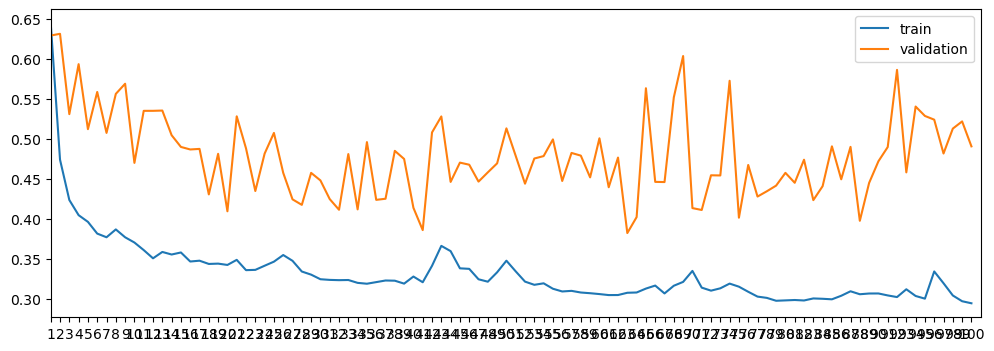

Epoch:100 Training Loss:0.2947978035096199 Validation Loss:0.4908394092883464: 100%|██████████| 100/100 [2:16:39<00:00, 81.99s/it]


In [190]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_CROP/GNMask240FLAIR.pt")

In [33]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GNMask240FLAIR.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\preprocessing.py:128: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  std=torch.std(image[brain==1])


Dice coefficient: 0.6007930784325458
IOU: tensor(0.4965, device='cuda:0')
Precision: tensor(0.7321, device='cuda:0')
Recall: tensor(0.5678, device='cuda:0')
Accuracy: tensor(0.9991, device='cuda:0')


In [22]:
transform, transform_label=transform_normalization(240,False,3)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GNMask240FLAIR.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.6174796806097455
IOU: tensor(0.4946, device='cuda:0')
Precision: tensor(0.7846, device='cuda:0')
Recall: tensor(0.5248, device='cuda:0')
Accuracy: tensor(0.9988, device='cuda:0')


0.00005
0.000025

In [34]:
transform, transform_label=transform_normalization(240,False,3)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


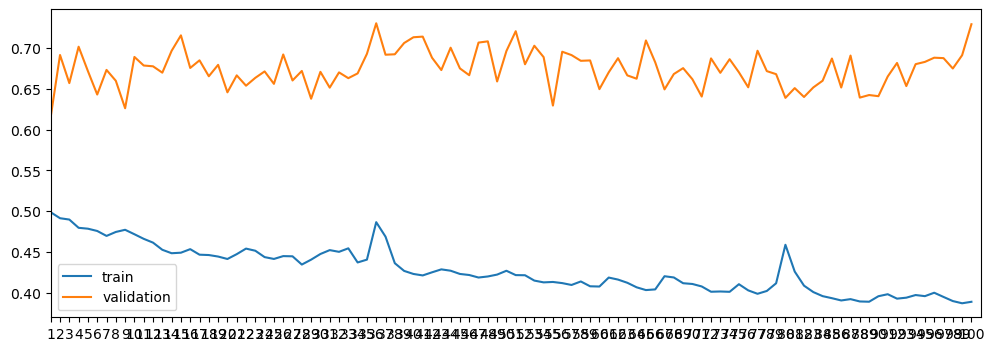

Epoch:100 Training Loss:0.38911405340317756 Validation Loss:0.7291551006145977: 100%|██████████| 100/100 [2:18:08<00:00, 82.88s/it]


In [194]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_CROP/GNMask240T1.pt")

In [35]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GNMask240T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.3370195203653088
IOU: tensor(0.2458, device='cuda:0')
Precision: tensor(0.4327, device='cuda:0')
Recall: tensor(0.3330, device='cuda:0')
Accuracy: tensor(0.9987, device='cuda:0')


In [24]:
transform, transform_label=transform_normalization(240,False,3)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GNMask240T1.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.3842601577823026
IOU: tensor(0.2710, device='cuda:0')
Precision: tensor(0.5140, device='cuda:0')
Recall: tensor(0.3353, device='cuda:0')
Accuracy: tensor(0.9980, device='cuda:0')


In [36]:
transform, transform_label=transform_normalization(240,False,5)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


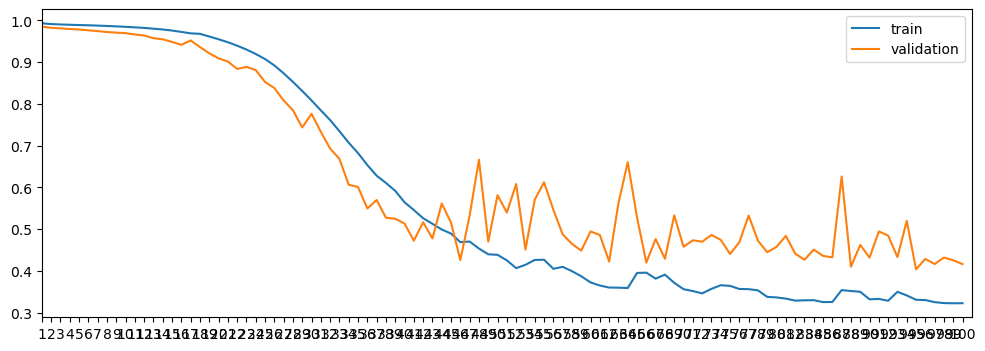

Epoch:100 Training Loss:0.3230087226436984 Validation Loss:0.4165342782779741: 100%|██████████| 100/100 [2:24:35<00:00, 86.75s/it]


In [201]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_CROP/GNFill240FLAIR.pt")

In [37]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GNFill240FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.590347215565182
IOU: tensor(0.4832, device='cuda:0')
Precision: tensor(0.7000, device='cuda:0')
Recall: tensor(0.5740, device='cuda:0')
Accuracy: tensor(0.9991, device='cuda:0')


In [25]:
transform, transform_label=transform_normalization(240,False,5)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GNFill240FLAIR.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.5959471047055153
IOU: tensor(0.4702, device='cuda:0')
Precision: tensor(0.7853, device='cuda:0')
Recall: tensor(0.5079, device='cuda:0')
Accuracy: tensor(0.9988, device='cuda:0')


1e-5
0.000025

In [38]:
transform, transform_label=transform_normalization(240,False,5)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


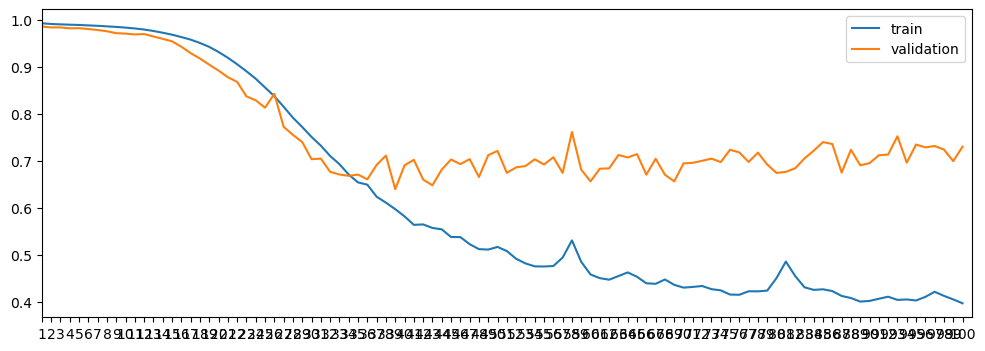

Epoch:100 Training Loss:0.39750465077738606 Validation Loss:0.7306468173983639: 100%|██████████| 100/100 [2:29:20<00:00, 89.61s/it]


In [39]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_CROP/GNFill240T1.pt")

In [39]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GNFill240T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.31319930055197687
IOU: tensor(0.2450, device='cuda:0')
Precision: tensor(0.3907, device='cuda:0')
Recall: tensor(0.3818, device='cuda:0')
Accuracy: tensor(0.9985, device='cuda:0')


In [26]:
transform, transform_label=transform_normalization(240,False,5)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GNFill240T1.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.359788456084373
IOU: tensor(0.2665, device='cuda:0')
Precision: tensor(0.5001, device='cuda:0')
Recall: tensor(0.3786, device='cuda:0')
Accuracy: tensor(0.9979, device='cuda:0')


## Min max Normalization 240x240 crop and pad

In [15]:
transform, transform_label=transform_normalization(240,False,2)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


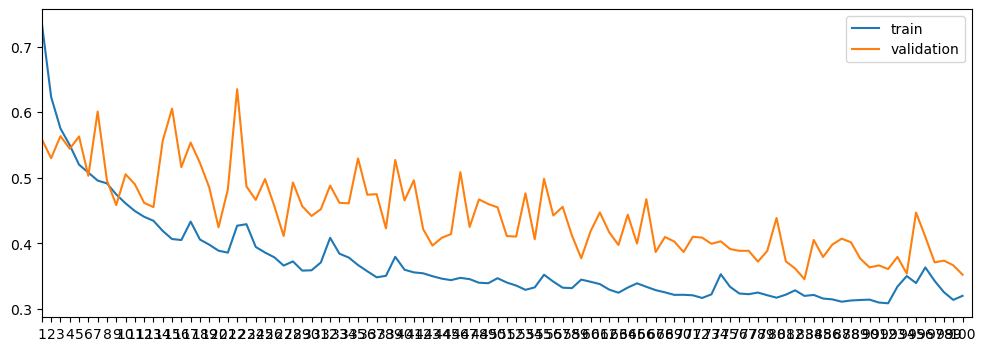

Epoch:100 Training Loss:0.3202128271902761 Validation Loss:0.35246419847748056: 100%|██████████| 100/100 [2:13:26<00:00, 80.06s/it]


In [42]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_CROP/MM240Flair.pt")

In [16]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_CROP/MM240Flair.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.6148005653215427
IOU: tensor(0.5119, device='cuda:0')
Precision: tensor(0.6660, device='cuda:0')
Recall: tensor(0.6478, device='cuda:0')
Accuracy: tensor(0.9992, device='cuda:0')


In [39]:
transform, transform_label=transform_normalization(240,False,2)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,10,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_CROP/MM240Flair.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.562257333418535
IOU: tensor(0.4553, device='cuda:0')
Precision: tensor(0.6255, device='cuda:0')
Recall: tensor(0.5383, device='cuda:0')
Accuracy: tensor(0.9990, device='cuda:0')


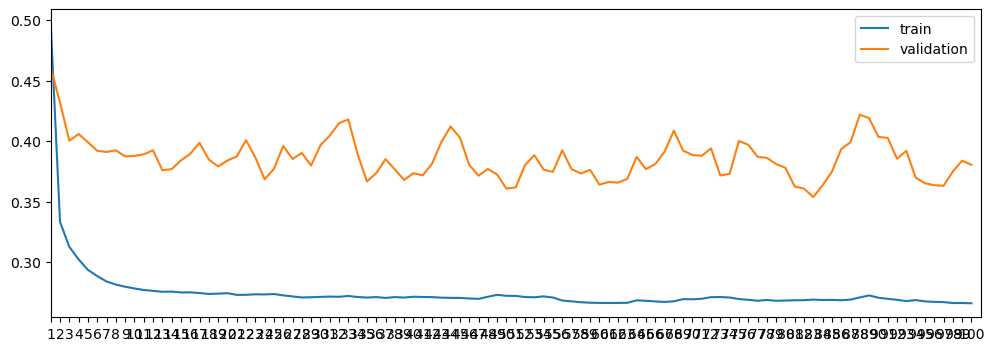

Epoch:100 Training Loss:0.2659680693380294 Validation Loss:0.3803600091879616: 100%|██████████| 100/100 [2:09:56<00:00, 77.97s/it]


In [60]:
epochs = 100
optim = Adam(model.parameters(), lr=0.00005)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_CROP/MM240Flair05.pt")

In [61]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_CROP/MM240Flair05.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.4754889623773682
IOU: tensor(0.3785, device='cuda:0')
Precision: tensor(0.5391, device='cuda:0')
Recall: tensor(0.4737, device='cuda:0')
Accuracy: tensor(0.9992, device='cuda:0')


In [17]:
transform, transform_label=transform_normalization(240,False,2)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


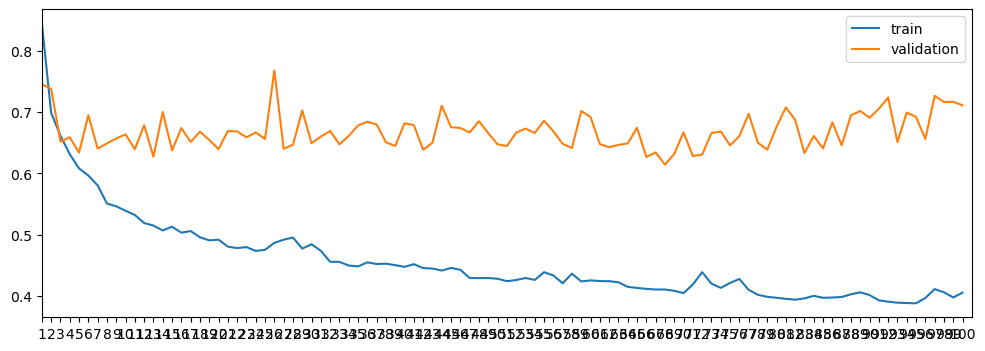

Epoch:100 Training Loss:0.4059330463409424 Validation Loss:0.7108434809714583: 100%|██████████| 100/100 [2:13:20<00:00, 80.01s/it]


In [45]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_CROP/MM240T1.pt")

In [18]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_CROP/MM240T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.34096224896908983
IOU: tensor(0.2504, device='cuda:0')
Precision: tensor(0.4652, device='cuda:0')
Recall: tensor(0.3186, device='cuda:0')
Accuracy: tensor(0.9987, device='cuda:0')


In [40]:
transform, transform_label=transform_normalization(240,False,2)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,10,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_CROP/MM240T1.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.3096598344934995
IOU: tensor(0.2193, device='cuda:0')
Precision: tensor(0.4600, device='cuda:0')
Recall: tensor(0.2589, device='cuda:0')
Accuracy: tensor(0.9981, device='cuda:0')


In [19]:
transform, transform_label=transform_normalization(240,False,4)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


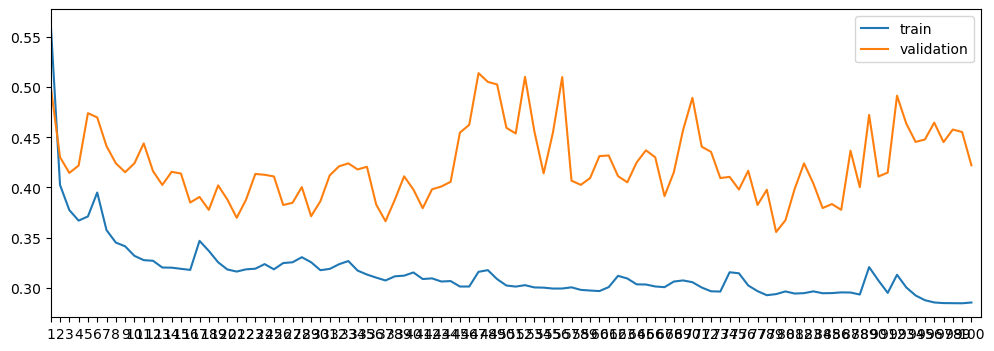

Epoch:100 Training Loss:0.28518663837063696 Validation Loss:0.4220479233907126: 100%|██████████| 100/100 [2:22:08<00:00, 85.29s/it]


In [48]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_CROP/MMmask240Flair.pt")

In [20]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_CROP/MMmask240Flair.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.6192808624101275
IOU: tensor(0.5138, device='cuda:0')
Precision: tensor(0.6989, device='cuda:0')
Recall: tensor(0.6218, device='cuda:0')
Accuracy: tensor(0.9992, device='cuda:0')


In [41]:
transform, transform_label=transform_normalization(240,False,4)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,10,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_CROP/MMmask240Flair.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.5514863736122473
IOU: tensor(0.4465, device='cuda:0')
Precision: tensor(0.6592, device='cuda:0')
Recall: tensor(0.5038, device='cuda:0')
Accuracy: tensor(0.9990, device='cuda:0')


In [21]:
transform, transform_label=transform_normalization(240,False,4)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


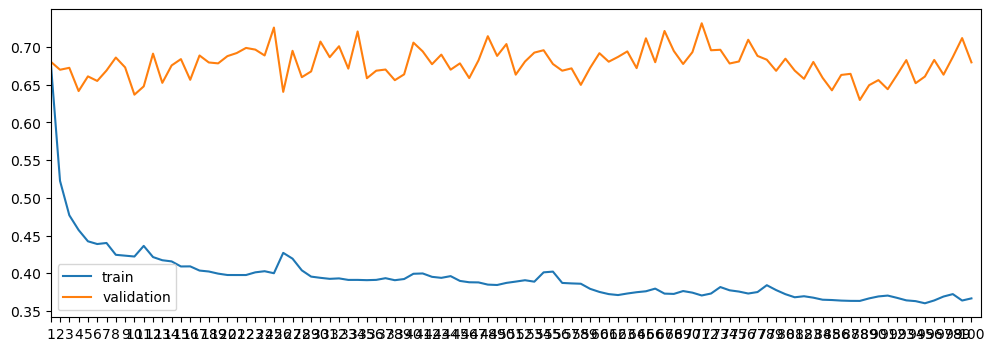

Epoch:100 Training Loss:0.36669225692749025 Validation Loss:0.6794510743744507: 100%|██████████| 100/100 [2:17:59<00:00, 82.80s/it]


In [51]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_CROP/MMmask240T1.pt")

In [22]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_CROP/MMmask240T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.3408214067742504
IOU: tensor(0.2492, device='cuda:0')
Precision: tensor(0.5112, device='cuda:0')
Recall: tensor(0.3059, device='cuda:0')
Accuracy: tensor(0.9987, device='cuda:0')


In [42]:
transform, transform_label=transform_normalization(240,False,4)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,10,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_CROP/MMmask240T1.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.29221879043350374
IOU: tensor(0.2044, device='cuda:0')
Precision: tensor(0.4750, device='cuda:0')
Recall: tensor(0.2338, device='cuda:0')
Accuracy: tensor(0.9981, device='cuda:0')


In [23]:
transform, transform_label=transform_normalization(240,False,6)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


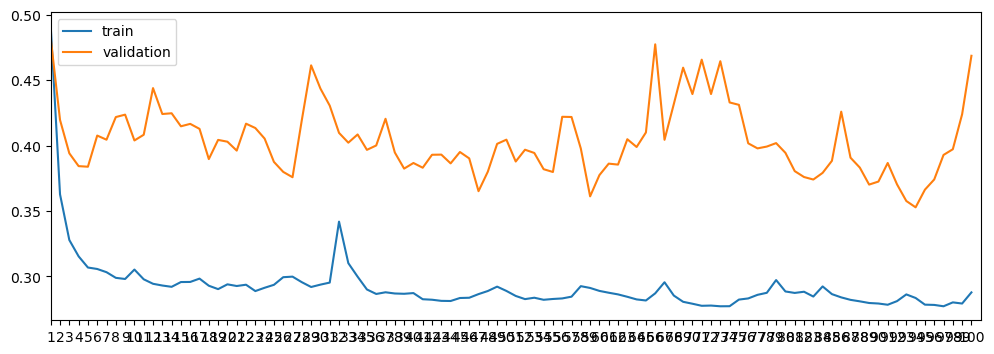

Epoch:100 Training Loss:0.2878286650103907 Validation Loss:0.4687799481968089: 100%|██████████| 100/100 [2:25:50<00:00, 87.50s/it]


In [54]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_CROP/MMFill240FLAIR.pt")

In [24]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_CROP/MMFill240FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.6097241378571763
IOU: tensor(0.5044, device='cuda:0')
Precision: tensor(0.6571, device='cuda:0')
Recall: tensor(0.6459, device='cuda:0')
Accuracy: tensor(0.9992, device='cuda:0')


In [43]:
transform, transform_label=transform_normalization(240,False,6)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,10,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_CROP/MMFill240Flair.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.5495297807877567
IOU: tensor(0.4455, device='cuda:0')
Precision: tensor(0.6189, device='cuda:0')
Recall: tensor(0.5176, device='cuda:0')
Accuracy: tensor(0.9990, device='cuda:0')


In [25]:
transform, transform_label=transform_normalization(240,False,6)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2311
514


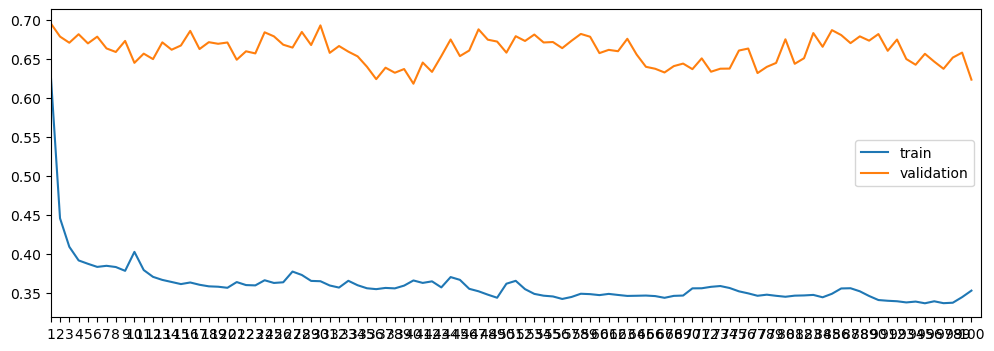

Epoch:100 Training Loss:0.35258320839174334 Validation Loss:0.623674099048147: 100%|██████████| 100/100 [2:26:25<00:00, 87.85s/it]


In [57]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_CROP/MMFill240T1.pt")

In [26]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_CROP/MMFill240T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.3278765258347055
IOU: tensor(0.2368, device='cuda:0')
Precision: tensor(0.4929, device='cuda:0')
Recall: tensor(0.2921, device='cuda:0')
Accuracy: tensor(0.9987, device='cuda:0')


In [44]:
transform, transform_label=transform_normalization(240,False,6)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,10,True)
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_CROP/MMFill240T1.pt")
calculate_metrics(model,val_dl, device)

2311
514
Dice coefficient: 0.30339310185388163
IOU: tensor(0.2137, device='cuda:0')
Precision: tensor(0.4700, device='cuda:0')
Recall: tensor(0.2504, device='cuda:0')
Accuracy: tensor(0.9981, device='cuda:0')


## Modelos Con Concatenate

Se ha seleccionado inicialmente crop de 240 y normalizacion gaussian entera
1 T1 2 FLAIR 

In [40]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsFLAIR","pathsT1",train,val,transform, transform_label,False,10)
test_data=Concatenate(TEST_DICT.get("pathsFLAIR"),TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2358
522


In [66]:
model = UNet(in_channels=2, out_channels=1, init_features=32)
model=model.to(device)

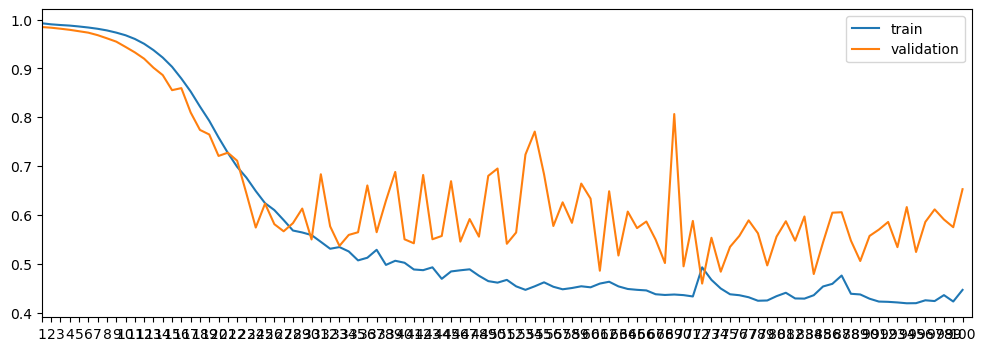

Epoch:100 Training Loss:0.4463474403681426 Validation Loss:0.6525675110641255: 100%|██████████| 100/100 [2:11:07<00:00, 78.68s/it]


In [64]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenate.pt")

In [44]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenate.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.4425434093863542
IOU: tensor(0.3458, device='cuda:0')
Precision: tensor(0.4496, device='cuda:0')
Recall: tensor(0.4995, device='cuda:0')
Accuracy: tensor(0.9991, device='cuda:0')


1 FLAIR 2 T1

In [22]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,False,15)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2358
522


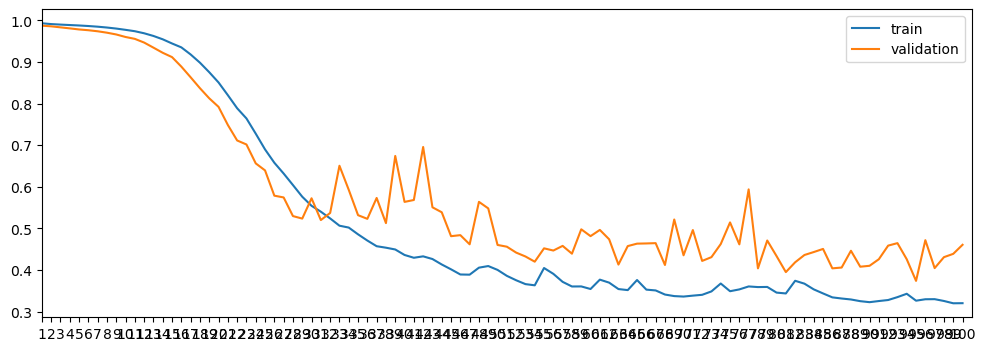

Epoch:100 Training Loss:0.32045054089638497 Validation Loss:0.4607130606807116: 100%|██████████| 100/100 [2:08:51<00:00, 77.32s/it]


In [69]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenate2.pt")

In [23]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenate2.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.5563837584372989
IOU: tensor(0.4790, device='cuda:0')
Precision: tensor(0.6832, device='cuda:0')
Recall: tensor(0.5658, device='cuda:0')
Accuracy: tensor(0.9992, device='cuda:0')


In [69]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,False,15)
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenate2.pt")
calculate_metrics(model,val_dl, device)

2358
522
Dice coefficient: 0.5476035721015438
IOU: tensor(0.4328, device='cuda:0')
Precision: tensor(0.6818, device='cuda:0')
Recall: tensor(0.4775, device='cuda:0')
Accuracy: tensor(0.9989, device='cuda:0')


###### MM 240 

In [70]:
model = UNet(in_channels=2, out_channels=1, init_features=32)
model=model.to(device)

In [71]:
transform, transform_label=transform_normalization(240,False,2)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsFLAIR","pathsT1",train,val,transform, transform_label,False,10)
test_data=Concatenate(TEST_DICT.get("pathsFLAIR"),TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


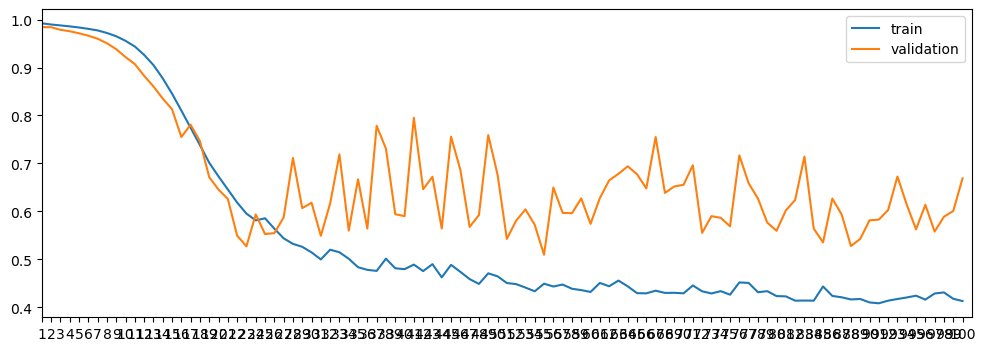

Epoch:100 Training Loss:0.4131298966962716 Validation Loss:0.6688438751792425: 100%|██████████| 100/100 [2:13:52<00:00, 80.32s/it]


In [72]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenate3.pt")

In [73]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenate3.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.4483504028776245
IOU: tensor(0.3512, device='cuda:0')
Precision: tensor(0.5250, device='cuda:0')
Recall: tensor(0.4580, device='cuda:0')
Accuracy: tensor(0.9991, device='cuda:0')


1: flair 2:t1

In [74]:
transform, transform_label=transform_normalization(240,False,2)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,False,15)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


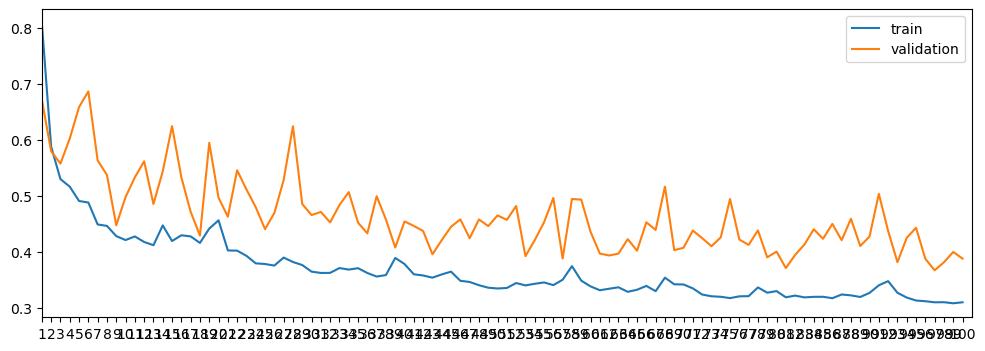

Epoch:100 Training Loss:0.30970353041925736 Validation Loss:0.38763805367167026: 100%|██████████| 100/100 [2:10:32<00:00, 78.32s/it]


In [75]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenate4.pt")

In [76]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenate4.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.47643646431632264
IOU: tensor(0.3831, device='cuda:0')
Precision: tensor(0.5487, device='cuda:0')
Recall: tensor(0.4714, device='cuda:0')
Accuracy: tensor(0.9992, device='cuda:0')


#### CAMBIAR LR

In [68]:
model = UNet(in_channels=2, out_channels=1, init_features=32)
model=model.to(device)

In [25]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,False,15)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2358
522


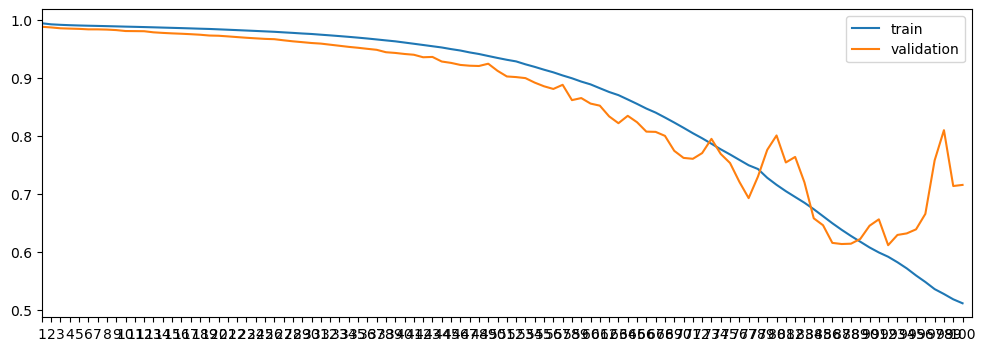

Epoch:100 Training Loss:0.5117258940973589 Validation Loss:0.7155213085011468: 100%|██████████| 100/100 [2:05:40<00:00, 75.40s/it]


In [91]:
epochs = 100
optim = Adam(model.parameters(), lr=0.000035)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenatelr35.pt")

In [ ]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenatelr35.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.2867863261173146
IOU: tensor(0.3181, device='cuda:0')
Precision: tensor(0.4482, device='cuda:0')
Recall: tensor(0.4691, device='cuda:0')
Accuracy: tensor(0.9990, device='cuda:0')


In [93]:
model = UNet(in_channels=2, out_channels=1, init_features=32)
model=model.to(device)

In [26]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,False,15)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2358
522


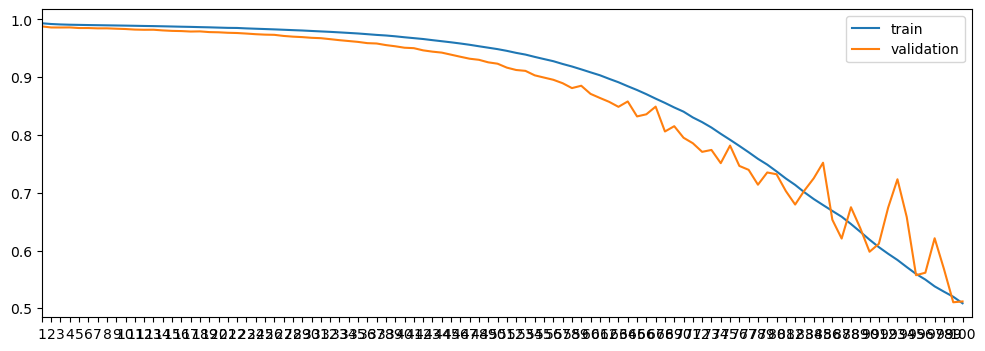

Epoch:100 Training Loss:0.5086564629308639 Validation Loss:0.5118572486967861: 100%|██████████| 100/100 [2:08:26<00:00, 77.06s/it]


In [95]:
epochs = 100
optim = Adam(model.parameters(), lr=0.00005)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenatelr5.pt")

In [27]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenatelr5.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.4348960258631996
IOU: tensor(0.4531, device='cuda:0')
Precision: tensor(0.5639, device='cuda:0')
Recall: tensor(0.6363, device='cuda:0')
Accuracy: tensor(0.9991, device='cuda:0')


In [70]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,False,15)
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenatelr5.pt")
calculate_metrics(model,val_dl, device)

2358
522
Dice coefficient: 0.43306729104556974
IOU: tensor(0.4023, device='cuda:0')
Precision: tensor(0.5804, device='cuda:0')
Recall: tensor(0.4733, device='cuda:0')
Accuracy: tensor(0.9989, device='cuda:0')


MÁS EPOCAS

In [83]:
model = UNet(in_channels=2, out_channels=1, init_features=32)
model=model.to(device)

In [29]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,False,15)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2358
522


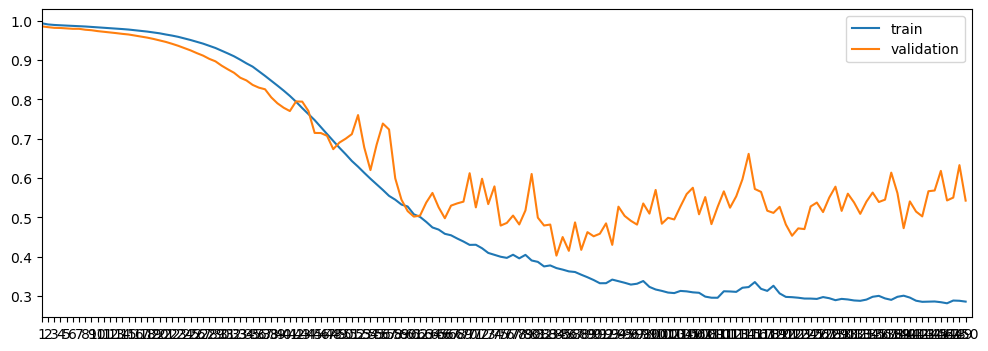

Epoch:150 Training Loss:0.285416135480327 Validation Loss:0.5424067064714482: 100%|██████████| 150/150 [3:13:55<00:00, 77.57s/it]  


In [126]:
epochs = 150
optim = Adam(model.parameters(), lr=0.00005)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenatelr5150.pt")

In [30]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenatelr5150.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.5530032174856546
IOU: tensor(0.4826, device='cuda:0')
Precision: tensor(0.6333, device='cuda:0')
Recall: tensor(0.6023, device='cuda:0')
Accuracy: tensor(0.9992, device='cuda:0')


In [84]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,False,15)
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenatelr5150.pt")
calculate_metrics(model,val_dl, device)

2358
522
Dice coefficient: 0.5158529662675782
IOU: tensor(0.4203, device='cuda:0')
Precision: tensor(0.6468, device='cuda:0')
Recall: tensor(0.4639, device='cuda:0')
Accuracy: tensor(0.9989, device='cuda:0')


AUMENTAR FEATURES

In [89]:
model = UNet(in_channels=2, out_channels=1, init_features=48)
model=model.to(device)

In [12]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,5)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2358
522


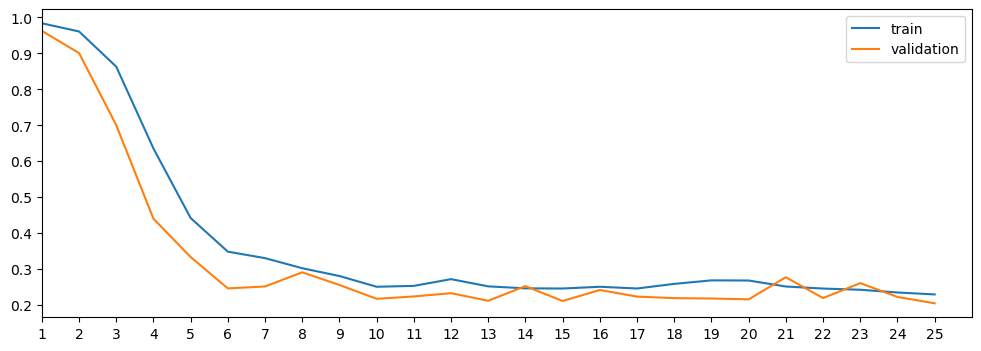

Epoch:25 Training Loss:0.22950918164675488 Validation Loss:0.20491765245818414: 100%|██████████| 25/25 [1:08:52<00:00, 165.32s/it]


In [18]:
epochs = 25
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenate5.pt")

In [13]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenate5.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.5969397403299809
IOU: tensor(0.5237, device='cuda:0')
Precision: tensor(0.6062, device='cuda:0')
Recall: tensor(0.7002, device='cuda:0')
Accuracy: tensor(0.9993, device='cuda:0')


In [91]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,15)
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenate5.pt")
calculate_metrics(model,val_dl, device)

2358
522
Dice coefficient: 0.8543684567723956
IOU: tensor(0.7484, device='cuda:0')
Precision: tensor(0.8630, device='cuda:0')
Recall: tensor(0.8494, device='cuda:0')
Accuracy: tensor(0.9991, device='cuda:0')


DISMINUIR FEATURES

In [20]:
model = UNet(in_channels=2, out_channels=1, init_features=24)
model=model.to(device)

In [21]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,15)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


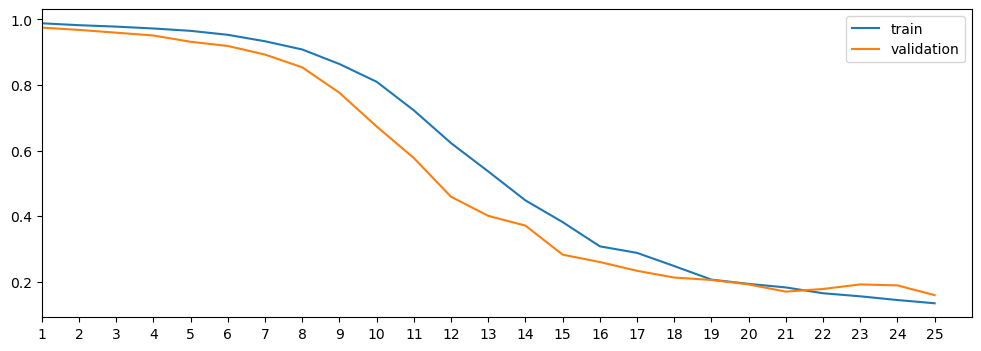

Epoch:25 Training Loss:0.13450410865968274 Validation Loss:0.1593698283048067: 100%|██████████| 25/25 [26:14<00:00, 62.96s/it]


In [22]:
epochs = 25
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenate6.pt")

In [23]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenate6.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.4388644768244687
IOU: tensor(0.4002, device='cuda:0')
Precision: tensor(0.5239, device='cuda:0')
Recall: tensor(0.5068, device='cuda:0')
Accuracy: tensor(0.9993, device='cuda:0')


SHUFFLED

In [93]:
model = UNet(in_channels=2, out_channels=1, init_features=32)
model=model.to(device)

In [33]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,15)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)

2358
522


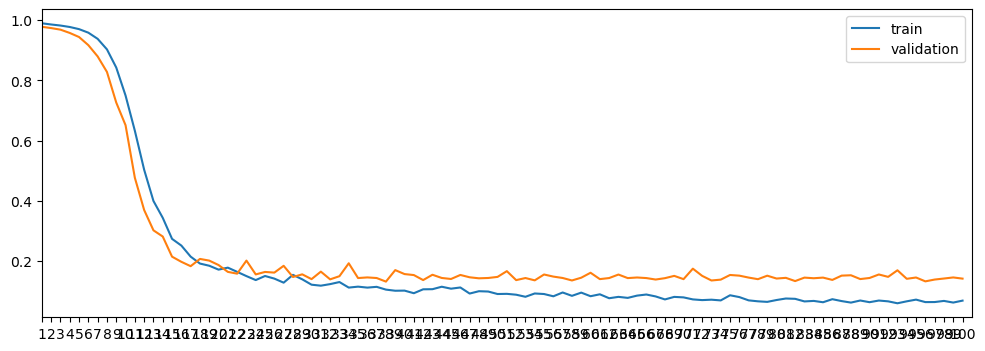

Epoch:100 Training Loss:0.06947620837919173 Validation Loss:0.1424300397518094: 100%|██████████| 100/100 [2:11:19<00:00, 78.79s/it]


In [130]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenateshuffled.pt")

In [34]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenateshuffled.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.58950458645636
IOU: tensor(0.5280, device='cuda:0')
Precision: tensor(0.6158, device='cuda:0')
Recall: tensor(0.6837, device='cuda:0')
Accuracy: tensor(0.9994, device='cuda:0')


In [94]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,13)
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenateshuffled.pt")
calculate_metrics(model,val_dl, device)

2358
522
Dice coefficient: 0.8401959509384341
IOU: tensor(0.7440, device='cuda:0')
Precision: tensor(0.8532, device='cuda:0')
Recall: tensor(0.8345, device='cuda:0')
Accuracy: tensor(0.9992, device='cuda:0')


## Data Augmentation

- Rotation (-15,15)
- Scale (0.9,1.1)
- Shearing(-18,18)


TypeError: pic should be PIL Image or ndarray. Got <class 'tuple'>

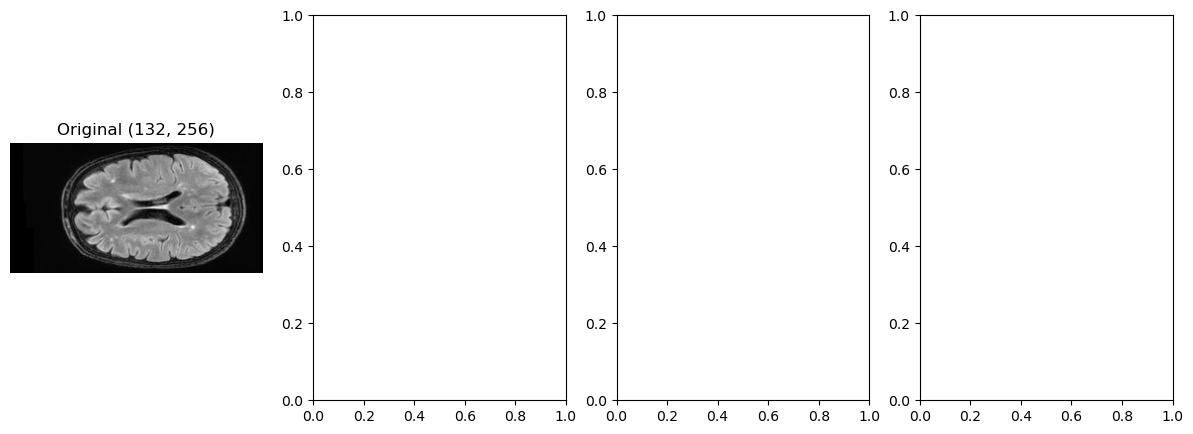

In [24]:
fig,axs = plt.subplots(1, 4, figsize=(15,5))
flair= os.path.join(TRAINING_PATH_AMSTERDAM, "100","pre","FLAIR.nii.gz")
img = nibabel.load(flair)
image_data = img.get_fdata() 
image_orig=image_data[:, :,53]
axs[0].imshow(image_orig, cmap='gray')
axs[0].set_title("Original %s" %(image_orig.shape,))
axs[0].axis('off')

image_rot,_=dataAugmentation(image_data[:, :, 53],image_data[:, :, 53],(-15,15),None,None)
axs[1].imshow(image_rot.squeeze(0), cmap='gray')
axs[1].set_title("Rotation %s" %(image_rot.shape,))
axs[1].axis('off')

image_scale,_=dataAugmentation(image_data[:, :, 53],image_data[:, :, 53],(0,0),(0.9,1.1),None)
axs[2].imshow(image_scale.squeeze(0), cmap='gray')
axs[2].set_title("scale %s" %(image_scale.shape,))
axs[2].axis('off')

image_she,_=dataAugmentation(image_data[:, :, 53],image_data[:, :, 53],(0,0),None,(-18,18))
axs[3].imshow(image_she.squeeze(0), cmap='gray')
axs[3].set_title("shear %s" %(image_she.shape,))
axs[3].axis('off')

(-0.5, 255.5, 131.5, -0.5)

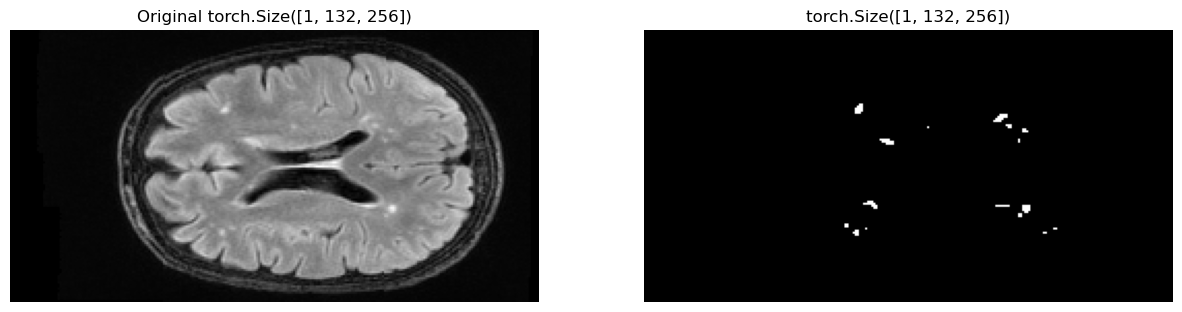

In [35]:
fig,axs = plt.subplots(1, 2, figsize=(15,5))
flair= os.path.join(TRAINING_PATH_AMSTERDAM, "100","pre","FLAIR.nii.gz")
img = nibabel.load(flair)
image_data = img.get_fdata() 
flairData=image_data[:, :,53]

mask= os.path.join(TRAINING_PATH_AMSTERDAM, "100","wmh.nii.gz")
img = nibabel.load(mask)
image_data = img.get_fdata() 
maskData=image_data[:, :,53]
flairData,maskData = dataAugmentation(flairData,maskData,(-15,15), None, None)
axs[0].imshow(flairData.squeeze(0), cmap='gray')
axs[0].set_title("Original %s" %(flairData.shape,))
axs[0].axis('off')


axs[1].imshow(maskData.squeeze(0), cmap='gray')
axs[1].set_title("%s" %(maskData.shape,))
axs[1].axis('off')

- 200 CROP
- GAUSSIAN NORMALIZATION FILL
- FEATURES 24
- 100-150 epochs

### 1000

In [45]:
model = UNet(in_channels=2, out_channels=1, init_features=48)
model=model.to(device)

In [56]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,5)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


In [57]:
train_data = Augmentation(train.get("pathsFLAIR"),train.get("pathsT1"),train.get("mask"), transform, transform_label,1000)
train_dl = DataLoader(train_data, batch_size=5, shuffle=True)

In [58]:
print(len(train_data.masks))

3311


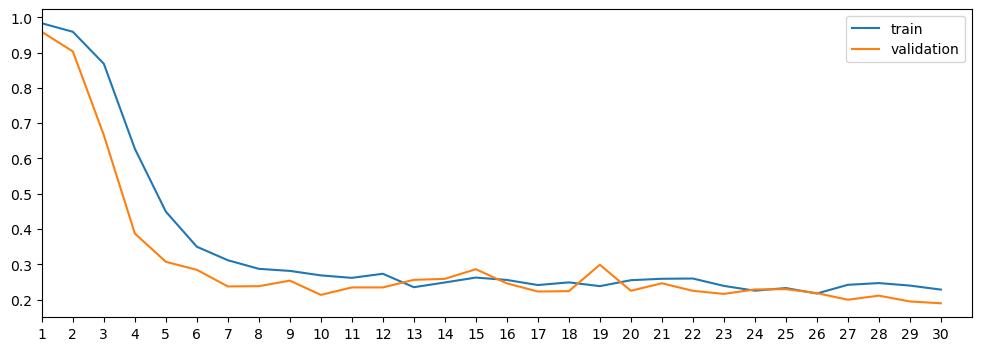

Epoch:30 Training Loss:0.22845325163579658 Validation Loss:0.18969883856719502: 100%|██████████| 30/30 [1:21:56<00:00, 163.89s/it]


In [59]:
epochs = 30
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/DATA_AUGMENTATION/DA1000.pt")

In [60]:
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA1000.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.5065798506517732
IOU: tensor(0.4119, device='cuda:0')
Precision: tensor(0.5070, device='cuda:0')
Recall: tensor(0.5610, device='cuda:0')
Accuracy: tensor(0.9993, device='cuda:0')


In [68]:
model = UNet(in_channels=2, out_channels=1, init_features=48)
model=model.to(device)

In [69]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,5)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)
train_data = Augmentation(train.get("pathsFLAIR"),train.get("pathsT1"),train.get("mask"), transform, transform_label,1000)
train_dl = DataLoader(train_data, batch_size=5, shuffle=True)

2311
514


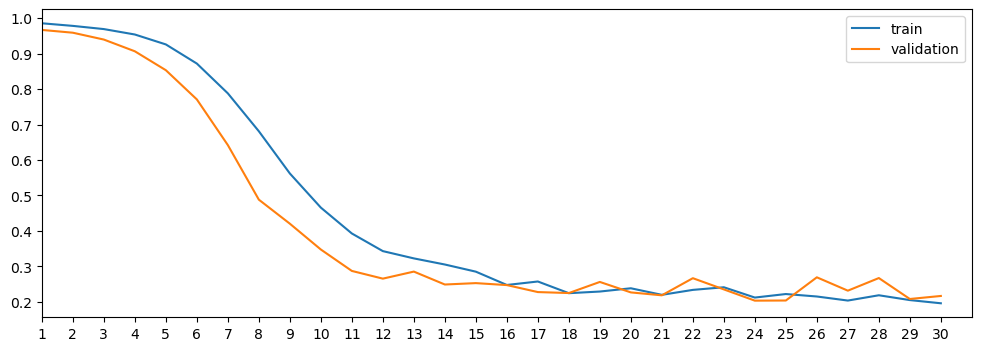

Epoch:30 Training Loss:0.1961210359764923 Validation Loss:0.21674516252062503: 100%|██████████| 30/30 [1:22:29<00:00, 164.98s/it] 


In [70]:
epochs = 30
optim = Adam(model.parameters(), lr=5e-5)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/DATA_AUGMENTATION/DA100050.pt")

In [71]:
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA100050.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.4699678247345721
IOU: tensor(0.3882, device='cuda:0')
Precision: tensor(0.5579, device='cuda:0')
Recall: tensor(0.4673, device='cuda:0')
Accuracy: tensor(0.9993, device='cuda:0')


In [11]:
model = UNet(in_channels=2, out_channels=1, init_features=48)
model=model.to(device)

In [86]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,5)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)
train_data = Augmentation(train.get("pathsFLAIR"),train.get("pathsT1"),train.get("mask"), transform, transform_label,1000)
train_dl = DataLoader(train_data, batch_size=5, shuffle=True)

2311
514


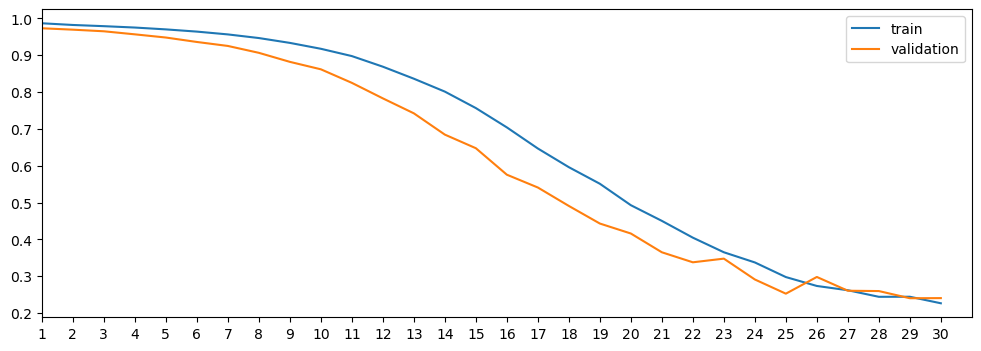

Epoch:30 Training Loss:0.22669340686200762 Validation Loss:0.24070769995819252: 100%|██████████| 30/30 [1:22:34<00:00, 165.15s/it]


In [91]:
epochs = 30
optim = Adam(model.parameters(), lr=0.000025)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/DATA_AUGMENTATION/DA100025.pt")

In [92]:
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA100025.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.4451067072798172
IOU: tensor(0.4011, device='cuda:0')
Precision: tensor(0.4910, device='cuda:0')
Recall: tensor(0.5554, device='cuda:0')
Accuracy: tensor(0.9993, device='cuda:0')


In [46]:
model = UNet(in_channels=2, out_channels=1, init_features=48)
model=model.to(device)

In [12]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,5)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)
train_data = Augmentation(train.get("pathsFLAIR"),train.get("pathsT1"),train.get("mask"), transform, transform_label,1000)
train_dl = DataLoader(train_data, batch_size=5, shuffle=True)

2358
522


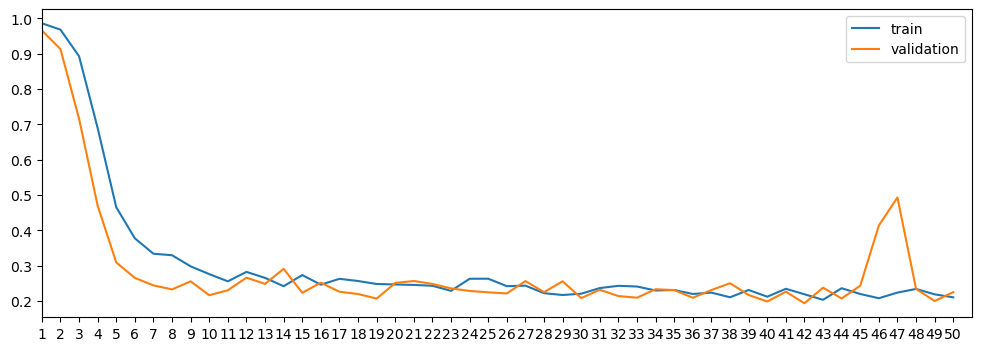

Epoch:50 Training Loss:0.21090603657698226 Validation Loss:0.22549869580348586: 100%|██████████| 50/50 [2:22:20<00:00, 170.81s/it]


In [13]:
epochs = 50
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/DATA_AUGMENTATION/DA1000PRUEBA.pt")

In [15]:
transform, transform_label=transform_normalization(240,False,1)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA1000PRUEBA.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.5871825636405265
IOU: tensor(0.5131, device='cuda:0')
Precision: tensor(0.6466, device='cuda:0')
Recall: tensor(0.6504, device='cuda:0')
Accuracy: tensor(0.9993, device='cuda:0')


In [47]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,5)
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA1000PRUEBA.pt")
calculate_metrics(model,val_dl, device)

2358
522
Dice coefficient: 0.7861464976323099
IOU: tensor(0.6789, device='cuda:0')
Precision: tensor(0.8115, device='cuda:0')
Recall: tensor(0.7850, device='cuda:0')
Accuracy: tensor(0.9991, device='cuda:0')


###### PRUEBA SOLO MEZCLANDO TRAIN

In [128]:
model = UNet(in_channels=2, out_channels=1, init_features=48)
model=model.to(device)

In [131]:
transform, transform_label=transform_normalization(240,False,1)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=True)
train_data = Augmentation(train.get("pathsFLAIR"),train.get("pathsT1"),train.get("mask"), transform, transform_label,1000)
train_dl = DataLoader(train_data, batch_size=5, shuffle=True)
val_data =Concatenate(val.get("pathsT1"),val.get("pathsFLAIR"), val.get("mask"), transform, transform_label)
val_dl = DataLoader(val_data, batch_size=15, shuffle=False)

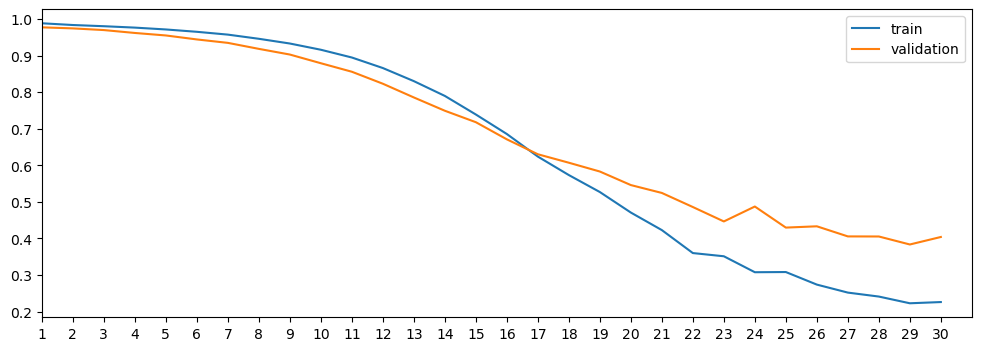

Epoch:30 Training Loss:0.22591478340569118 Validation Loss:0.40396921717289136: 100%|██████████| 30/30 [1:22:12<00:00, 164.40s/it]


In [129]:
epochs = 30
optim = Adam(model.parameters(), lr=0.000025)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/DATA_AUGMENTATION/DA1000shuffle.pt")

In [130]:
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA1000shuffle.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.4488215422322834
IOU: tensor(0.3953, device='cuda:0')
Precision: tensor(0.4822, device='cuda:0')
Recall: tensor(0.5551, device='cuda:0')
Accuracy: tensor(0.9993, device='cuda:0')


### 2000

In [48]:
model = UNet(in_channels=2, out_channels=1, init_features=58)
model=model.to(device)

In [14]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,5)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)
train_data = Augmentation(train.get("pathsFLAIR"),train.get("pathsT1"),train.get("mask"), transform, transform_label,2000)
train_dl = DataLoader(train_data, batch_size=5, shuffle=True)

2358
522


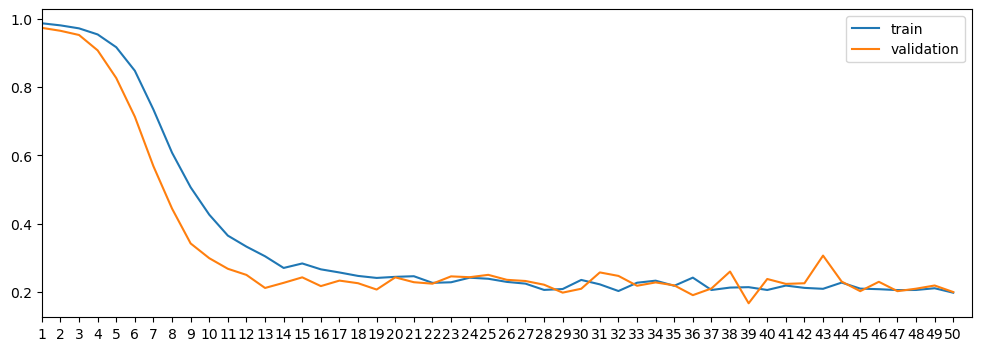

Epoch:50 Training Loss:0.19725631909855343 Validation Loss:0.19923915036048412: 100%|██████████| 50/50 [3:04:42<00:00, 221.64s/it]


In [15]:
epochs = 50
optim = Adam(model.parameters(), lr=0.00005)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/DATA_AUGMENTATION/DA2000.pt")

In [13]:
transform, transform_label=transform_normalization(240,False,1)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA2000.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.5910770320687321
IOU: tensor(0.5219, device='cuda:0')
Precision: tensor(0.6475, device='cuda:0')
Recall: tensor(0.6584, device='cuda:0')
Accuracy: tensor(0.9993, device='cuda:0')


In [49]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,5)
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA2000.pt")
calculate_metrics(model,val_dl, device)

2358
522
Dice coefficient: 0.7643110633435981
IOU: tensor(0.6643, device='cuda:0')
Precision: tensor(0.8049, device='cuda:0')
Recall: tensor(0.7456, device='cuda:0')
Accuracy: tensor(0.9992, device='cuda:0')


### 3000

In [60]:
model = UNet(in_channels=2, out_channels=1, init_features=58)
model=model.to(device)

In [17]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,5)
train_data = Augmentation(train.get("pathsFLAIR"),train.get("pathsT1"),train.get("mask"), transform, transform_label,3000)
train_dl = DataLoader(train_data, batch_size=5, shuffle=True)

2358
522


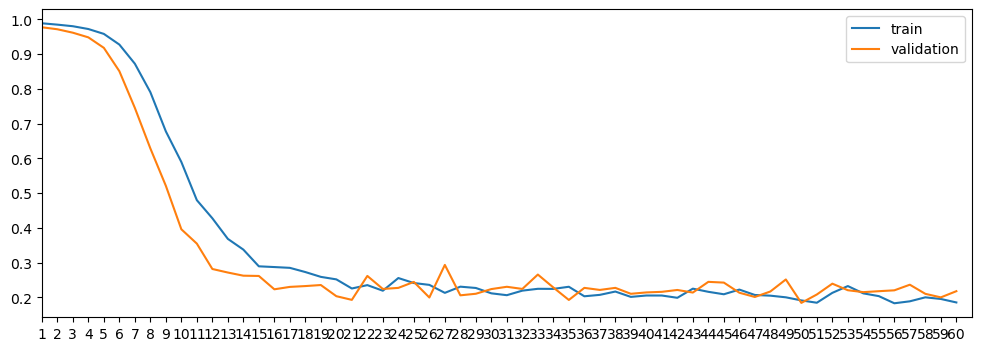

Epoch:60 Training Loss:0.18533211744437783 Validation Loss:0.21776496541203755: 100%|██████████| 60/60 [3:32:54<00:00, 212.90s/it]


In [18]:
epochs = 60
optim = Adam(model.parameters(), lr=0.00005)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/DATA_AUGMENTATION/DA3000.pt")

In [12]:
transform, transform_label=transform_normalization(240,False,1)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA3000.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.5899239131527162
IOU: tensor(0.5159, device='cuda:0')
Precision: tensor(0.6157, device='cuda:0')
Recall: tensor(0.6734, device='cuda:0')
Accuracy: tensor(0.9993, device='cuda:0')


In [61]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,5)
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA3000.pt")
calculate_metrics(model,val_dl, device)

2358
522
Dice coefficient: 0.7909715101832435
IOU: tensor(0.6759, device='cuda:0')
Precision: tensor(0.7924, device='cuda:0')
Recall: tensor(0.8068, device='cuda:0')
Accuracy: tensor(0.9990, device='cuda:0')


### 4000

In [63]:
model = UNet(in_channels=2, out_channels=1, init_features=62)
model=model.to(device)

In [27]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,5)
train_data = Augmentation(train.get("pathsFLAIR"),train.get("pathsT1"),train.get("mask"), transform, transform_label,4000)
train_dl = DataLoader(train_data, batch_size=5, shuffle=True)

2358
522


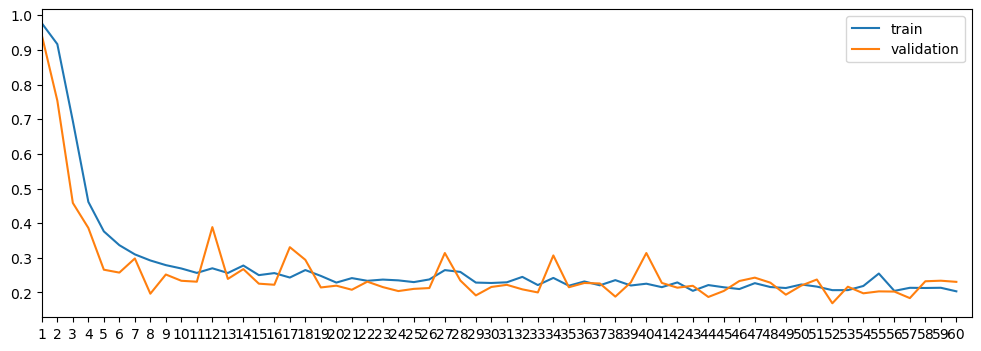

Epoch:60 Training Loss:0.2033777295027749 Validation Loss:0.2306747588467968: 100%|██████████| 60/60 [3:45:25<00:00, 225.43s/it] 


In [28]:
epochs = 60
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/DATA_AUGMENTATION/DA4000.pt")

In [13]:
transform, transform_label=transform_normalization(240,False,1)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=29, shuffle=True)
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA4000.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.604107431769371
IOU: tensor(0.6903, device='cuda:0')
Precision: tensor(0.7843, device='cuda:0')
Recall: tensor(0.8573, device='cuda:0')
Accuracy: tensor(0.9993, device='cuda:0')


In [65]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,5)
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA4000.pt")
calculate_metrics(model,val_dl, device)

2358
522
Dice coefficient: 0.7879296618242632
IOU: tensor(0.6833, device='cuda:0')
Precision: tensor(0.7748, device='cuda:0')
Recall: tensor(0.8206, device='cuda:0')
Accuracy: tensor(0.9992, device='cuda:0')


### 5000

In [54]:
model = UNet(in_channels=2, out_channels=1, init_features=62)
model=model.to(device)

In [12]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,5)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=29, shuffle=True)
train_data = Augmentation(train.get("pathsFLAIR"),train.get("pathsT1"),train.get("mask"), transform, transform_label,5000)
train_dl = DataLoader(train_data, batch_size=5, shuffle=True)

2358
522


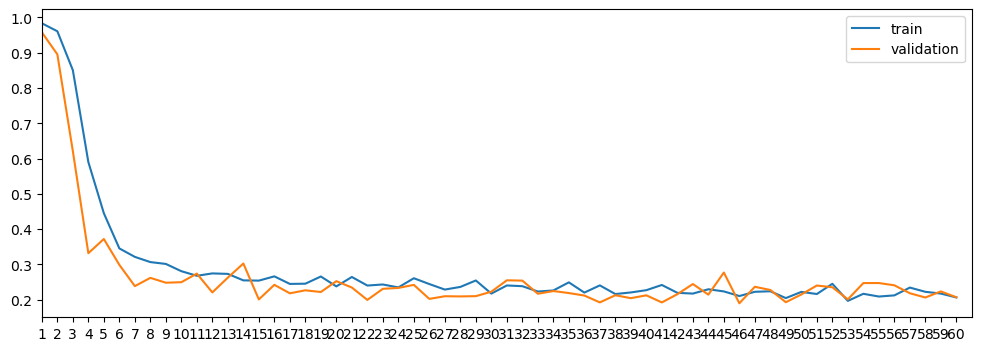

Epoch:60 Training Loss:0.20617271543054258 Validation Loss:0.20663488150532677: 100%|██████████| 60/60 [3:43:57<00:00, 223.95s/it]


In [16]:
epochs = 60
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/DATA_AUGMENTATION/DA5000.pt")

In [15]:
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA5000.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.6128003111481667
IOU: tensor(0.6790, device='cuda:0')
Precision: tensor(0.7918, device='cuda:0')
Recall: tensor(0.8330, device='cuda:0')
Accuracy: tensor(0.9993, device='cuda:0')


In [ ]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,5)
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA5000.pt")
calculate_metrics(model,val_dl, device)

2358
522
Dice coefficient: 0.7813408494864291
IOU: tensor(0.6714, device='cuda:0')
Precision: tensor(0.8013, device='cuda:0')
Recall: tensor(0.7847, device='cuda:0')
Accuracy: tensor(0.9992, device='cuda:0')


### 6000

In [112]:
model = UNet(in_channels=2, out_channels=1, init_features=48)
model=model.to(device)

In [120]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,5)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=True)
train_data = Augmentation(train.get("pathsFLAIR"),train.get("pathsT1"),train.get("mask"), transform, transform_label,6000)
train_dl = DataLoader(train_data, batch_size=5, shuffle=True)

2311
514


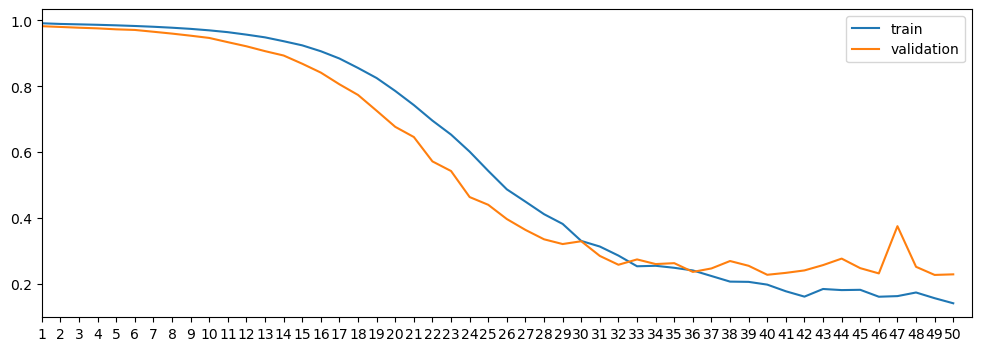

Epoch:50 Training Loss:0.1418730935834139 Validation Loss:0.22961493677654218: 100%|██████████| 50/50 [2:25:13<00:00, 174.28s/it]


In [110]:
epochs = 50
optim = Adam(model.parameters(), lr=0.000025)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/DATA_AUGMENTATION/DA6000.pt")

SIN MEZCLAR TEST

In [119]:
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA6000.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.48533733814244656
IOU: tensor(0.4035, device='cuda:0')
Precision: tensor(0.5433, device='cuda:0')
Recall: tensor(0.4987, device='cuda:0')
Accuracy: tensor(0.9993, device='cuda:0')


MEZCLANDO TEST

In [88]:
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA6000.pt")
calculate_metrics(model,test_dl, device)

torch.Size([5, 1, 240, 240]) torch.Size([5, 1, 240, 240])
tensor(0.8097, device='cuda:0')
torch.Size([5, 1, 240, 240]) torch.Size([5, 1, 240, 240])
tensor(0.8222, device='cuda:0')
torch.Size([5, 1, 240, 240]) torch.Size([5, 1, 240, 240])
tensor(0.8661, device='cuda:0')
torch.Size([5, 1, 240, 240]) torch.Size([5, 1, 240, 240])
tensor(0.8273, device='cuda:0')
torch.Size([5, 1, 240, 240]) torch.Size([5, 1, 240, 240])
tensor(0.8996, device='cuda:0')
torch.Size([5, 1, 240, 240]) torch.Size([5, 1, 240, 240])
tensor(0., device='cuda:0')
torch.Size([5, 1, 240, 240]) torch.Size([5, 1, 240, 240])
tensor(0.6328, device='cuda:0')
torch.Size([5, 1, 240, 240]) torch.Size([5, 1, 240, 240])
tensor(0.8995, device='cuda:0')
torch.Size([5, 1, 240, 240]) torch.Size([5, 1, 240, 240])
tensor(0., device='cuda:0')
torch.Size([5, 1, 240, 240]) torch.Size([5, 1, 240, 240])
tensor(0., device='cuda:0')
torch.Size([5, 1, 240, 240]) torch.Size([5, 1, 240, 240])
tensor(0.8554, device='cuda:0')
torch.Size([5, 1, 240,

KeyboardInterrupt: 

In [12]:
model = UNet(in_channels=2, out_channels=1, init_features=48)
model=model.to(device)

In [49]:
transform, transform_label=transform_normalization(240,False,1)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=5, shuffle=True)
train_data = Augmentation(train.get("pathsFLAIR"),train.get("pathsT1"),train.get("mask"), transform, transform_label,6000)
train_dl = DataLoader(train_data, batch_size=5, shuffle=True)
val_data =Concatenate(val.get("pathsT1"),val.get("pathsFLAIR"), val.get("mask"), transform, transform_label)
val_dl = DataLoader(val_data, batch_size=15, shuffle=False)

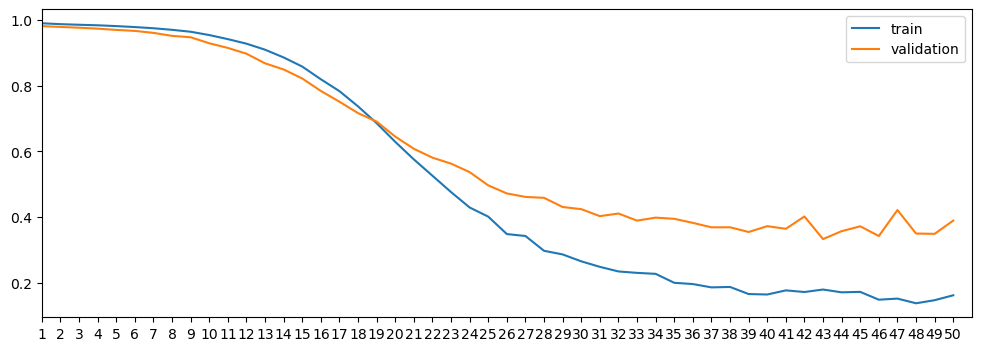

Epoch:50 Training Loss:0.16139608724585877 Validation Loss:0.38917241184640167: 100%|██████████| 50/50 [2:23:20<00:00, 172.02s/it]


In [95]:
epochs = 50
optim = Adam(model.parameters(), lr=0.000025)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/DATA_AUGMENTATION/DA6000shuffle.pt")

In [96]:
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA6000shuffle.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.47360491361577095
IOU: tensor(0.3885, device='cuda:0')
Precision: tensor(0.4660, device='cuda:0')
Recall: tensor(0.5580, device='cuda:0')
Accuracy: tensor(0.9992, device='cuda:0')


In [100]:
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA6000shuffle.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.6563789951941815
IOU: 0
Precision: 0
Recall: 0
Accuracy: 0


### ÚLTIMA PRUEBA

In [34]:
model = UNet(in_channels=2, out_channels=1, init_features=54)
model=model.to(device)

In [35]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,5)
train_data = Augmentation(train.get("pathsFLAIR"),train.get("pathsT1"),train.get("mask"), transform, transform_label,3000)
train_dl = DataLoader(train_data, batch_size=5, shuffle=True)

2311
514


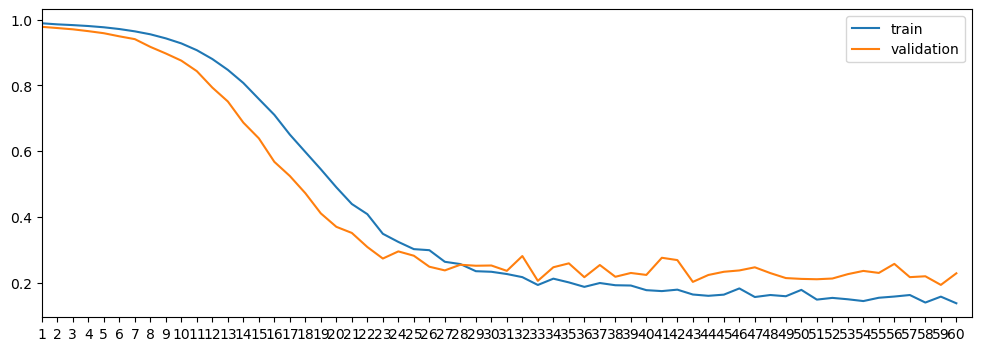

Epoch:60 Training Loss:0.13708029516829784 Validation Loss:0.22831021092104392: 100%|██████████| 60/60 [3:09:18<00:00, 189.31s/it]


In [36]:
epochs = 100
optim = Adam(model.parameters(), lr=0.000025)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/DATA_AUGMENTATION/DA3000final.pt")

In [41]:
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=True)

In [40]:
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA3000final.pt")
calculate_metrics(model,test_dl, device)

0.5067809235930243

In [43]:
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA3000final.pt")
calculate_metrics(model,test_dl, device)

0.700773366109321

In [38]:
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA3000final.pt")
calculate_metrics(model,test_dl, device)

0.31826428062052

## RESULTADOS SEGMENTACIÓN DEL MEJOR MODELO OBTENIDO

In [11]:
from uib_vfeatures.masks import Masks
from uib_vfeatures import Features_mask as ftrs

In [16]:
model = UNet(in_channels=2, out_channels=1, init_features=62)
model = model.to(device)
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA4000.pt")
transform, transform_label=transform_normalization(240,False,1)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=True)

In [50]:
def generador(loader):
    for data, target in loader:
        data, target = data.to(device).float(), target.float().to(device)
        yield data, target 
def showsegmentation(test_dl, mmodel):               
    with torch.no_grad():
        gen = generador(test_dl)

        data, true_labels = next(gen)

        mmodel.eval()
        flair_image = data[14, 0, :, :].cpu().numpy()
        t1_image = data[14, 1, :, :].cpu().numpy()

        output = mmodel(data)
      
        _,axs =plt.subplots(1,4, figsize=(15,5))
        true_label=torch.squeeze(true_labels[14]).cpu().numpy()
        output = torch.squeeze(output[14]).cpu().numpy()

        axs[0].imshow(flair_image, cmap='gray')
        axs[0].set_title("FLAIR Image")

        axs[1].imshow(t1_image, cmap='gray')
        axs[1].set_title("T1 Image")
        
        axs[2].imshow(output, cmap='gray')
        axs[2].set_title("Output")
        axs[3].imshow(true_label, cmap='gray')
        axs[3].set_title("Label Mask")
        
        plt.show()
def showContorns(test_dl, mmodel):
     _,axs =plt.subplots(1,2, figsize=(15,5))
     with torch.no_grad():
        gen = generador(test_dl)

        data, true_labels = next(gen)
        output = mmodel(data)
        true_label=torch.squeeze(true_labels[14]).cpu().numpy()
        output = torch.squeeze(output[14]).cpu().numpy()

        contours, x = cv2.findContours((output *255).astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contoursl, _ = cv2.findContours((true_label *255).astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        print("Se han detectado ",len(contours))
        print("En la máscara había ",len(contoursl))
      
        axs[0].imshow(output, cmap='gray')
        axs[0].set_title("Output")
        axs[1].imshow(true_label, cmap='gray')
        axs[1].set_title("Label Mask")
        text = f"Se han detectado {len(contours)} contornos.\nEn la máscara había {len(contoursl)} contornos."
        plt.figtext(0.5, 0.01, text, wrap=True, horizontalalignment='center', fontsize=10)
        plt.show()

In [36]:
def mediaContornosNODETECT(test_dl, model):
    model.eval()
    with torch.no_grad():
        lesionesNO =[]
        lesionesSI = []
        total = 0
        r10 =[]
        r20 = []
        r50= []
        for input_img, targets in test_dl:
            input_img = input_img.to(device).float()
            targets = targets.to(device).float()

            outputs = model(input_img)
            
            
            for output,target in zip(outputs, targets):
                output = torch.squeeze(output).cpu().numpy()
                target = torch.squeeze(target).cpu().numpy()
                contours, x = cv2.findContours((output *255).astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                contours1, _ = cv2.findContours((target *255).astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                total += len(contours1)
                for c in contours1:
                    esta =False
                    for con in contours:
                        ret = cv2.matchShapes(c,con,2,0.0)
                        if ret < 0.1:
                           esta = True
                           lesionesSI.append(cv2.contourArea(c))
                           break
                    if(not esta):
                        lesionesNO.append(cv2.contourArea(c))
        print("Número total de contornos en las máscaras:", total)
        print("Numero de contornos no detectados: ", len(lesionesNO)) 
        print("Area media de las lesiones no detectadas: ", np.mean(lesionesNO)) 
        for v in lesionesNO:
            if v <= 10:
                r10.append(v)
            elif 20 <= v <= 50:
                r20.append(v)
            else:
                r50.append(v) 
        print("Numero de lesiones no detectadas con area inferior a 10", len(r10))
        print("Media: ", np.mean(r10))  
        print("Numero de lesiones no detectadas con area entre 20 y 50", len(r20))
        print("Media: ", np.mean(r20))        
        print("Numero de lesiones no detectadas con area superior a 50", len(r50))
        print("Media: ", np.mean(r50))  
        print("Número de contornos detectados:", len(lesionesSI))  
        print("Area media de las lesiones no detectadas: ", np.mean(lesionesSI))  
        r10 =[]
        r20 = []
        r50= [] 
        for v in lesionesSI:
            if v <= 10:
                r10.append(v)
            elif 20 <= v <= 50:
                r20.append(v)
            else:
                r50.append(v) 
        print("Numero de lesiones detectadas con area inferior a 10", len(r10))
        print("Media: ", np.mean(r10))  
        print("Numero de lesiones detectadas con area entre 20 y 50", len(r20))
        print("Media: ", np.mean(r20))        
        print("Numero de lesiones detectadas con area superior a 50", len(r50))
        print("Media: ", np.mean(r50))              


Se han detectado  4
En la máscara había  4


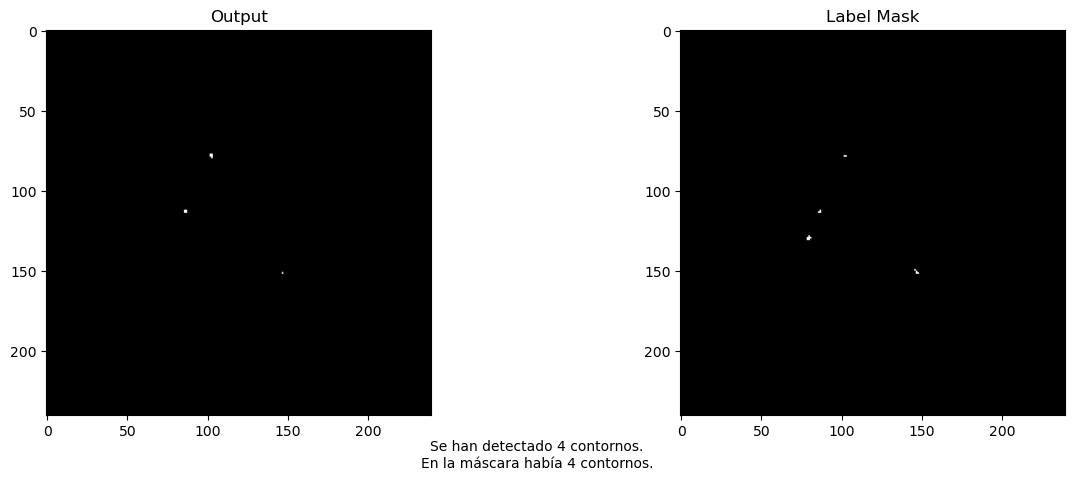

In [64]:
showContorns(test_dl, model)

In [21]:
mediaContornosNODETECT(test_dl, model)

C:\Users\Aina\AppData\Local\Temp\ipykernel_62692\1124418927.py:20: RuntimeWarning: invalid value encountered in cast
  contours, x = cv2.findContours((output *255).astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


Número total de contornos en las máscaras: 18443
Numero de contornos no detectados:  9278
Area media de las lesiones no detectadas:  43.81122009053675
Numero de lesiones no detectadas con area inferior a 10 5117
Media:  3.5528630056673833
Numero de lesiones no detectadas con area entre 20 y 50 1315
Media:  31.985931558935363
Numero de lesiones no detectadas con area superior a 50 2846
Media:  121.65811665495433
Número de contornos detectados: 9165
Numero de lesiones detectadas con area inferior a 10 8471
Media:  1.3264077440679967
Numero de lesiones detectadas con area entre 20 y 50 214
Media:  31.647196261682243
Numero de lesiones detectadas con area superior a 50 480
Media:  49.80625


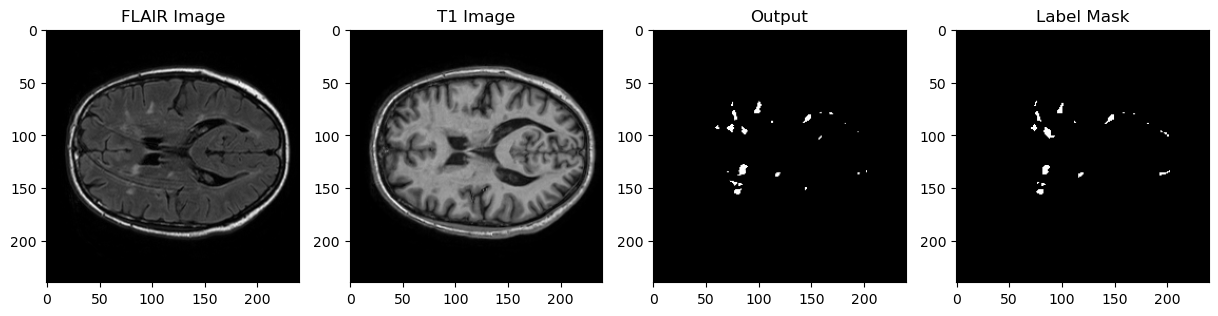

In [22]:
showsegmentation(test_dl, model)

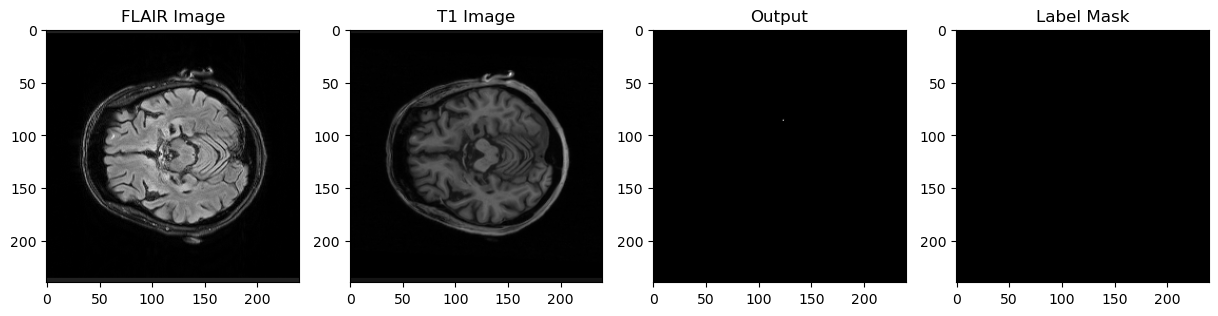

In [79]:
showsegmentation(test_dl, model)

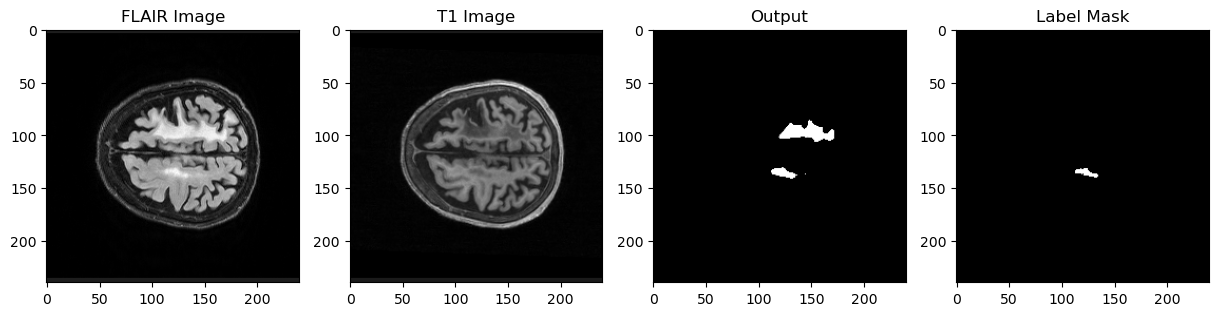

In [28]:
showsegmentation(test_dl, model)

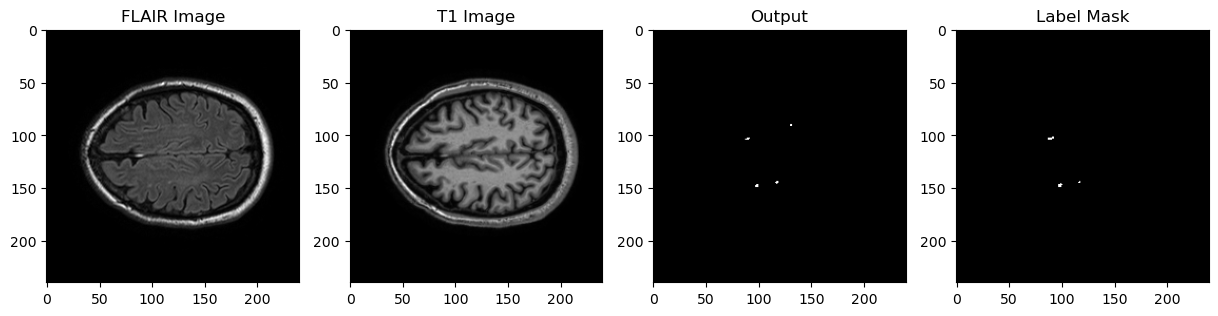

In [34]:
showsegmentation(test_dl, model)

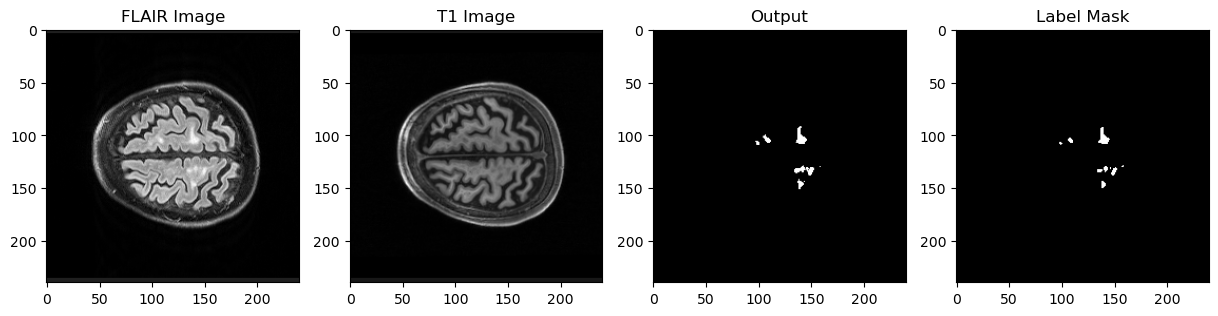

In [31]:
showsegmentation(test_dl, model)

## CONCATENAR SEGMENTACIONES

In [103]:
def getsegmentation(model, test_dl):
    seg = []
    model.eval()
    with torch.no_grad():
        for input_img, target in test_dl:
            input_img = input_img.to(device).float()
            target = target.to(device).float()
            output = model(input_img)
            seg.append(output)
    return seg

In [16]:
transform, transform_label = transform_setter(128,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,False)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)
model=assignPretrainedModel(device,"./Modelos3DUNET/NODeletion128FLAIR.pt")
segFLAIR = getsegmentation(model, test_dl)

In [17]:
test_data2=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,False)
test_dl2 = DataLoader(test_data2, batch_size=29,shuffle=False)
model2=assignPretrainedModel(device,"./Modelos3DUNET/NODeletion128T1.pt")
segT1 = getsegmentation(model2,test_dl2)

Dice coefficient: 0.31593588705767284
IOU: tensor(0.2255, device='cuda:0')
Precision: tensor(0.3459, device='cuda:0')
Recall: tensor(0.3804, device='cuda:0')
Accuracy: tensor(0.9981, device='cuda:0')


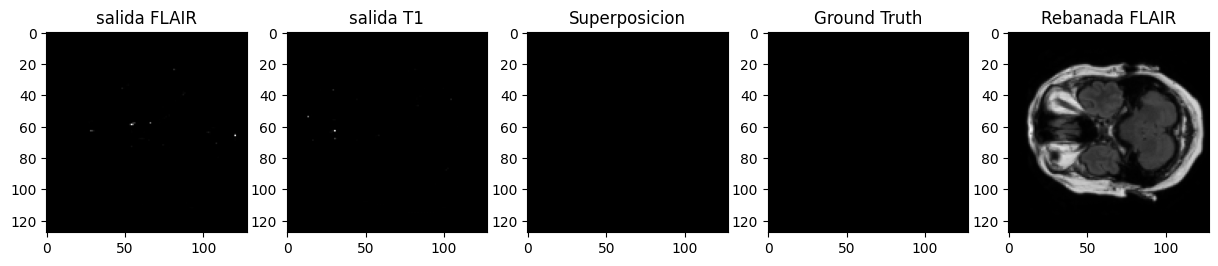

In [106]:
transform, transform_label = transform_setter(128,True)
test_data=Slices(val.get("pathsFLAIR"), val.get("mask"), transform, transform_label,False)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)
model=assignPretrainedModel(device,"./Modelos3DUNET/NODeletion128FLAIR.pt")
segFLAIR = getsegmentation(model, test_dl)
test_data2=Slices(val.get("pathsT1"), val.get("mask"), transform, transform_label,False)
test_dl2 = DataLoader(test_data2, batch_size=15,shuffle=False)
model2=assignPretrainedModel(device,"./Modelos3DUNET/NODeletion128T1.pt")
segT1 = getsegmentation(model2,test_dl2)
calculate_metrics2(segFLAIR,segT1,test_dl)
show(test_dl, test_dl2)

In [105]:
import torch

def calculate_metrics2(seg1, seg2, test_dl):
    total_dice = 0
    total_pre = 0
    total_rec = 0
    total_acc = 0
    total_iou=0
    total = len(test_dl)
    
    for i,(_, target) in enumerate(test_dl):
        target = target.to(device).float()
        
        output = torch.sum(torch.stack([seg1[i],seg2[i]]), dim=0)
        
        output = (output > 0.5).float()
        target= (target > 0.5).float()
        dice = dice_coeff(output, target)
        dice = np.nan_to_num(dice.cpu().numpy())
        total_dice += dice
        
        
        pre = precision_score(output, target)
        total_pre+=pre

        rec = recall_score(output, target)
        total_rec+=rec

        acc = accuracy(output, target)
        total_acc+=acc

        iou = iou_score(output, target)
        total_iou+=iou
            


    total_dice /= total
    total_pre /=total
    total_rec /=total
    total_acc /=total
    total_iou /= total
    print("Dice coefficient:", total_dice)
    print("IOU:", total_iou)
    print("Precision:", total_pre)
    print("Recall:", total_rec)
    print("Accuracy:", total_acc)

def generador(loader):
    for data, target in loader:
        data, target = data.to(device).float(), target.float().to(device)
        yield data, target 
def show(test_dl, test_dl2):               
    with torch.no_grad():
        gen1 = generador(test_dl)
        gen2 = generador(test_dl2)
        

        data, true_labels = next(gen1)
        data2, _ = next(gen2)

        model.eval()
        model2.eval()

        flairs = model(data)
        tis = model2(data2)
      
        _,axs =plt.subplots(1,5, figsize=(15,5))
        img = torch.squeeze(data[12]).cpu().numpy()
        true_label=torch.squeeze(true_labels[12]).cpu().numpy()
        flair = torch.squeeze(flairs[12]).cpu().numpy()
        ti = torch.squeeze(tis[12]).cpu().numpy()
        output = torch.sum(torch.stack([flairs,tis]), dim=0)
        output = (output > 0.5).float()
        output = torch.squeeze(output[12]).cpu().numpy()

        axs[0].imshow(flair, cmap='gray')
        axs[0].set_title("salida FLAIR")

        axs[1].imshow(ti, cmap='gray')
        axs[1].set_title("salida T1")
        
        axs[2].imshow(output, cmap='gray')
        axs[2].set_title("Superposicion")

        axs[3].imshow(true_label, cmap='gray')
        axs[3].set_title("Ground Truth")
        

        axs[4].imshow(img, cmap='gray')
        axs[4].set_title("Rebanada FLAIR")
        
        
        plt.show()


Dice coefficient: 0.31976196242216975
IOU: tensor(0.2298, device='cuda:0')
Precision: tensor(0.3496, device='cuda:0')
Recall: tensor(0.4130, device='cuda:0')
Accuracy: tensor(0.9987, device='cuda:0')


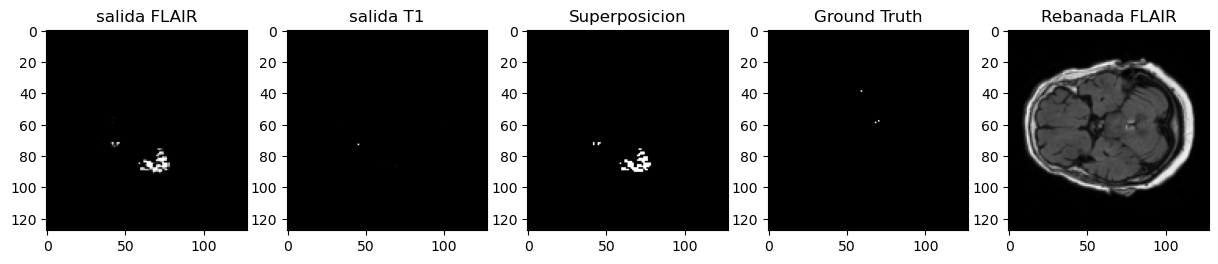

In [19]:
calculate_metrics2(segFLAIR,segT1,test_dl)
show(test_dl, test_dl2)

In [107]:
transform, transform_label = transform_setter(128,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)
model=assignPretrainedModel(device,"./Modelos3DUNET/Deletion128FLAIR.pt")
segFLAIR = getsegmentation(model, test_dl)
test_data2=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl2 = DataLoader(test_data2, batch_size=15, shuffle=False)
model2=assignPretrainedModel(device,"./Modelos3DUNET/Deletion128T1.pt")
segT1 = getsegmentation(model2,test_dl2)

Dice coefficient: 0.4534835900525151
IOU: tensor(0.3326, device='cuda:0')
Precision: tensor(0.4123, device='cuda:0')
Recall: tensor(0.5777, device='cuda:0')
Accuracy: tensor(0.9985, device='cuda:0')


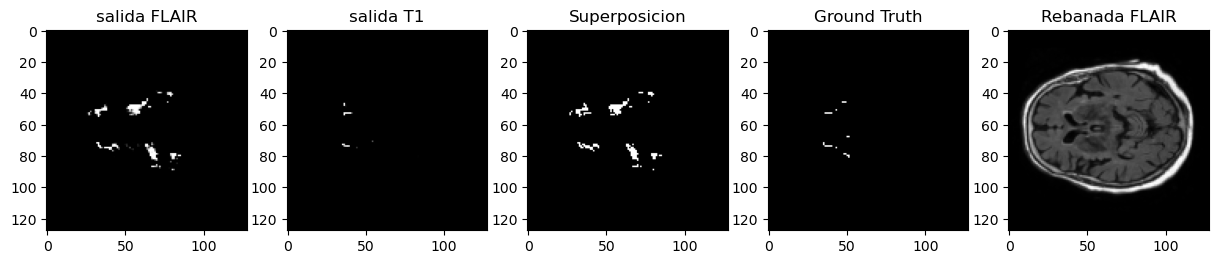

In [23]:
calculate_metrics2(segFLAIR,segT1,test_dl)
show(test_dl, test_dl2)

Dice coefficient: 0.47552628644875117
IOU: tensor(0.3490, device='cuda:0')
Precision: tensor(0.4753, device='cuda:0')
Recall: tensor(0.5517, device='cuda:0')
Accuracy: tensor(0.9978, device='cuda:0')


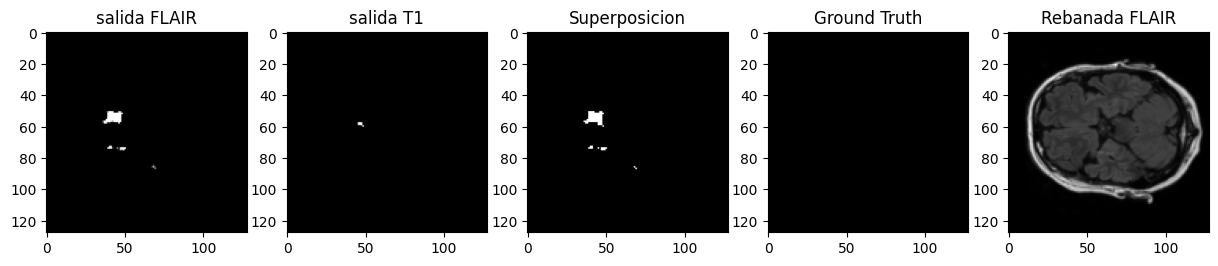

In [108]:
transform, transform_label = transform_setter(128,True)
test_data=Slices(val.get("pathsFLAIR"), val.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)
model=assignPretrainedModel(device,"./Modelos3DUNET/Deletion128FLAIR.pt")
segFLAIR = getsegmentation(model, test_dl)
test_data2=Slices(val.get("pathsT1"), val.get("mask"), transform, transform_label,True)
test_dl2 = DataLoader(test_data2, batch_size=15, shuffle=False)
model2=assignPretrainedModel(device,"./Modelos3DUNET/Deletion128T1.pt")
segT1 = getsegmentation(model2,test_dl2)
calculate_metrics2(segFLAIR,segT1,test_dl)
show(test_dl, test_dl2)

In [9]:
transform, transform_label = transform_setter(256,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=29, shuffle=False)
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize256FLAIR.pt")
segFLAIR = getsegmentation(model, test_dl)

In [ ]:
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl2 = DataLoader(test_data, batch_size=15, shuffle=False)
model2=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize256T1.pt")
segT1 = getsegmentation(model2,test_dl2)

In [ ]:
calculate_metrics2(segFLAIR,segT1,test_dl)
show(test_dl, test_dl2)

In [ ]:
transform, transform_label = transform_setter(384,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize384FLAIR.pt")
segFLAIR = getsegmentation(model, test_dl)
test_data2=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl2 = DataLoader(test_data2, batch_size=15, shuffle=False)
model2=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize384T1.pt")
segT1 = getsegmentation(model2,test_dl2)

In [ ]:
calculate_metrics2(segFLAIR,segT1,test_dl)
show(test_dl, test_dl2)

In [ ]:
transform, transform_label = transform_setter(200,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize200FLAIRpad.pt")
segFLAIR = getsegmentation(model, test_dl)
test_data2=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl2 = DataLoader(test_data2, batch_size=15, shuffle=False)
model2=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize200T1pad.pt")
segT1 = getsegmentation(model2,test_dl2)

In [ ]:
calculate_metrics2(segFLAIR,segT1,test_dl)
show(test_dl, test_dl2)

In [ ]:
transform, transform_label = transform_setter(200,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)
model=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize200FLAIRcrop.pt")
segFLAIR = getsegmentation(model, test_dl)
test_data2=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl2 = DataLoader(test_data2, batch_size=15, shuffle=False)
model2=assignPretrainedModel(device,"./Modelos3DUNET/RESIZE/Resize200T1crop.pt")
segT1 = getsegmentation(model2,test_dl2)